# **Online Retail Customer Segmentation.**

 Project Type - Unsupervised ML(Clustering)

Contribution - Team

Team Member 1 - Sonam Dhiman

Team Member 2 - Moditha Vasuki R

## **Project Summary**
For every retail company, client segmentation is a crucial procedure because it aids in analysing customer behaviour, preferences, and demands. By examining client information including purchase history, website behaviour, demographics, and social media activity, online retailers can segment their customer base. Here are a few typical methods for dividing up internet shoppers for retail:

**Geographic segmentation:**Customers must be divided into groups according to their geographic location, such as their country, region, city, or zip code. Customers from various geographical locations with various wants and preferences can be identified using this.
Customer segments are created using psychographic criteria, such as personality, lifestyle, interests, and values. Using this, marketers can create client groups with comparable psychographic traits and adapt their communications to meet those groups' particular needs.

**Demographic segmentation:** Customers must be divided into groups according to their age, gender, economic level, level of education, and other demographic factors. This makes it easier to find consumer segments with comparable demands and tastes.
Segmenting customers based on their online behaviour, such as past purchases, browsing patterns, and amount of time spent on a website, is known as behavioural segmentation. This can be used to determine repeat consumers, regular shoppers, and first-time purchasers.</br>

**Purchase history segmentation:** Customers are segmented in this way depending on things like how frequently they make purchases, how much their average order is worth, and what kinds of products they typically buy. This can be used to find high-value clients, their product preferences, and purchasing trends.
Online retailers can create targeted marketing campaigns, individualised recommendations, and customer experiences that are tailored to the particular requirements of each consumer group by using various segmentation approaches to analyse customer data.


## **Github Link**

https://github.com/Moditha06/Online-Retail-Customer-Segmentation


## <b> Problem Statement </b>

On a global data set that includes every transaction made by a UK-based and registered non-store internet retailer between December 1, 2010, and December 9, 2011, we aim to identify the most important client segments.The company primarily offers one-of-a-kind gifts for every occasion. The company has a large number of wholesalers as clients.


## <b> Data Description </b>


* **InvoiceNo:** Account number. Nominal, an intrinsic 6-digit number assigned specifically to each transaction. This code denotes a cancellation if it begins with the letter "c."

* **StockCode:** Product or item number. A 5-digit integral number known as the nominal is assigned to each unique product.
* **Description:** Name of the nominal product (item).
* **Quantity:** The number of each item (product) in a single transaction. Numeric.
* **InvoiceDate:** Invoice Time and date. the day and hour that each transaction was produced, and a number.
* **UnitPrice:** Unit cost. Numbers, Product Price in Pounds Sterling Per Unit.
* **CustomerID:** Customer number.Nominal, a five-digit integral number provided to each client specifically
* **Country:** Country name. Nominal, the name of the country where each customer resides.

# **Let's Begin !**

## ***1. know Your Data***

## Import Libraries

In [1]:
# Importing required libraries
import numpy as np
# To handle the dataset
import pandas as pd

# For plots and visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
from yellowbrick.cluster import SilhouetteVisualizer

# For getting optimal number of clusters in hierarchical clustering
from scipy.cluster.hierarchy import dendrogram,linkage
# To scale the data
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# metrics to evaluate the clusters
from sklearn.metrics import silhouette_score, silhouette_samples
# Clustering alorithms
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
# Display utilities
from IPython.display import Markdown, display

# activating DND to disregard the warnings by goiing silent mode
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
#importing the dataset from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#load the dataset from drive
df = pd.read_csv('/Online Retail.xlsx - Online Retail.csv')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [8]:
# Checking top 5 records
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom

In [9]:
# Checking bottom 5 records
df.tail()

InvoiceNo StockCode                    Description  Quantity  \
115563    546133     21915         RED  HARMONICA IN BOX       12.0   
115564    546133     21914         BLUE HARMONICA IN BOX       12.0   
115565    546133     22405  MONEY BOX POCKET MONEY DESIGN      12.0   
115566    546133     22492        MINI PAINT SET VINTAGE       36.0   
115567    546133     22637                      PIGGY BAN       NaN   

         InvoiceDate  UnitPrice  CustomerID         Country  
115563  3/9/11 15:20       1.25     14291.0  United Kingdom  
115564  3/9/11 15:20       1.25     14291.0  United Kingdom  
115565  3/9/11 15:20       1.25     14291.0  United Kingdom  
115566  3/9/11 15:20       0.65     14291.0  United Kingdom  
115567           NaN        NaN         NaN             NaN

### Dataset Rows & Columns count

In [10]:
df.shape

(115568, 8)

### Dataset Information

In [11]:
# Basic Info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115568 entries, 0 to 115567
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    115568 non-null  object 
 1   StockCode    115568 non-null  object 
 2   Description  115240 non-null  object 
 3   Quantity     115567 non-null  float64
 4   InvoiceDate  115567 non-null  object 
 5   UnitPrice    115567 non-null  float64
 6   CustomerID   77219 non-null   float64
 7   Country      115567 non-null  object 
dtypes: float64(3), object(5)
memory usage: 7.1+ MB


In [12]:
#Checking numbers of unique values in each colums
for i in df.columns:
  print(i,':' ,df[i].nunique())

InvoiceNo : 5434
StockCode : 3210
Description : 3129
Quantity : 323
InvoiceDate : 4916
UnitPrice : 625
CustomerID : 1891
Country : 31


# **Data cleaning and Feature Engineering**

In [13]:
#missing data counts and percentage

missing = df.columns[df.isnull().any()].tolist()
missing

print('Missing Data count')
print(df[missing].isnull().sum().sort_values(ascending=False))

print('Missing Data Percentage')
print(round(df[missing].isnull().sum().sort_values(ascending=False)/len(df)*100,2))

Missing Data count
CustomerID     38349
Description      328
Quantity           1
InvoiceDate        1
UnitPrice          1
Country            1
dtype: int64
Missing Data Percentage
CustomerID     33.18
Description     0.28
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
Country         0.00
dtype: float64



1. Of all purchases, 24.93% are not attributed to any one consumer
2. Therefore, having the data without a client assignment is useless.
3. Because we need CustomerID to create clusters, we shall remove them from the dataset.










In [14]:
# Dropping the rows with null values
df.dropna(subset=['CustomerID'],inplace=True)

In [15]:
# Checking duplicates
print(len(df[df.duplicated()]))

1026


In [16]:
# Dropping duplicate rows
df.drop_duplicates(inplace=True)

In [17]:
# checking null counts and datatype in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76193 entries, 0 to 115566
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    76193 non-null  object 
 1   StockCode    76193 non-null  object 
 2   Description  76193 non-null  object 
 3   Quantity     76193 non-null  float64
 4   InvoiceDate  76193 non-null  object 
 5   UnitPrice    76193 non-null  float64
 6   CustomerID   76193 non-null  float64
 7   Country      76193 non-null  object 
dtypes: float64(3), object(5)
memory usage: 5.2+ MB


## ***2. Understanding Your Variables***

In [18]:
# Checking all the columns present in the dataset
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [19]:
# Descriptive Statistics
df.describe()

Quantity     UnitPrice    CustomerID
count  76193.000000  76193.000000  76193.000000
mean      12.049086      3.322670  15317.477957
std      384.742654     10.526287   1748.547577
min   -74215.000000      0.000000  12346.000000
25%        2.000000      1.250000  13881.000000
50%        5.000000      1.950000  15281.000000
75%       12.000000      3.750000  16923.000000
max    74215.000000   1715.850000  18283.000000

In [21]:

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Now, perform operations on the datetime column
df["year"] = df["InvoiceDate"].dt.year
df['Month'] = df['InvoiceDate'].dt.month_name()
df['Day'] = df['InvoiceDate'].dt.day_name()
df["hour"] = df["InvoiceDate"].dt.hour

In [22]:
# Creating a new feature 'TotalAmount' by multiplying Quantity and UnitPrice
df['TotalAmount']= df['UnitPrice'] * df['Quantity']

In [23]:
# Creating a new feature 'TimeType' based on hours to define whether its Morning,Afternoon or Evening

df['TimeType'] = np.where((df["hour"]>5)&(df["hour"]<18), np.where(
                           df["hour"]<12, 'Morning','Afternoon'),'Evening')

In [24]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
cancellations = df[df['InvoiceNo'].str.contains('C')]
cancellations.shape

(1980, 14)

In [25]:
# Dropping cancellations from the main dataframe
df = df[~df['InvoiceNo'].str.contains('C')]

# **Exploratory Data Analysis (EDA)**

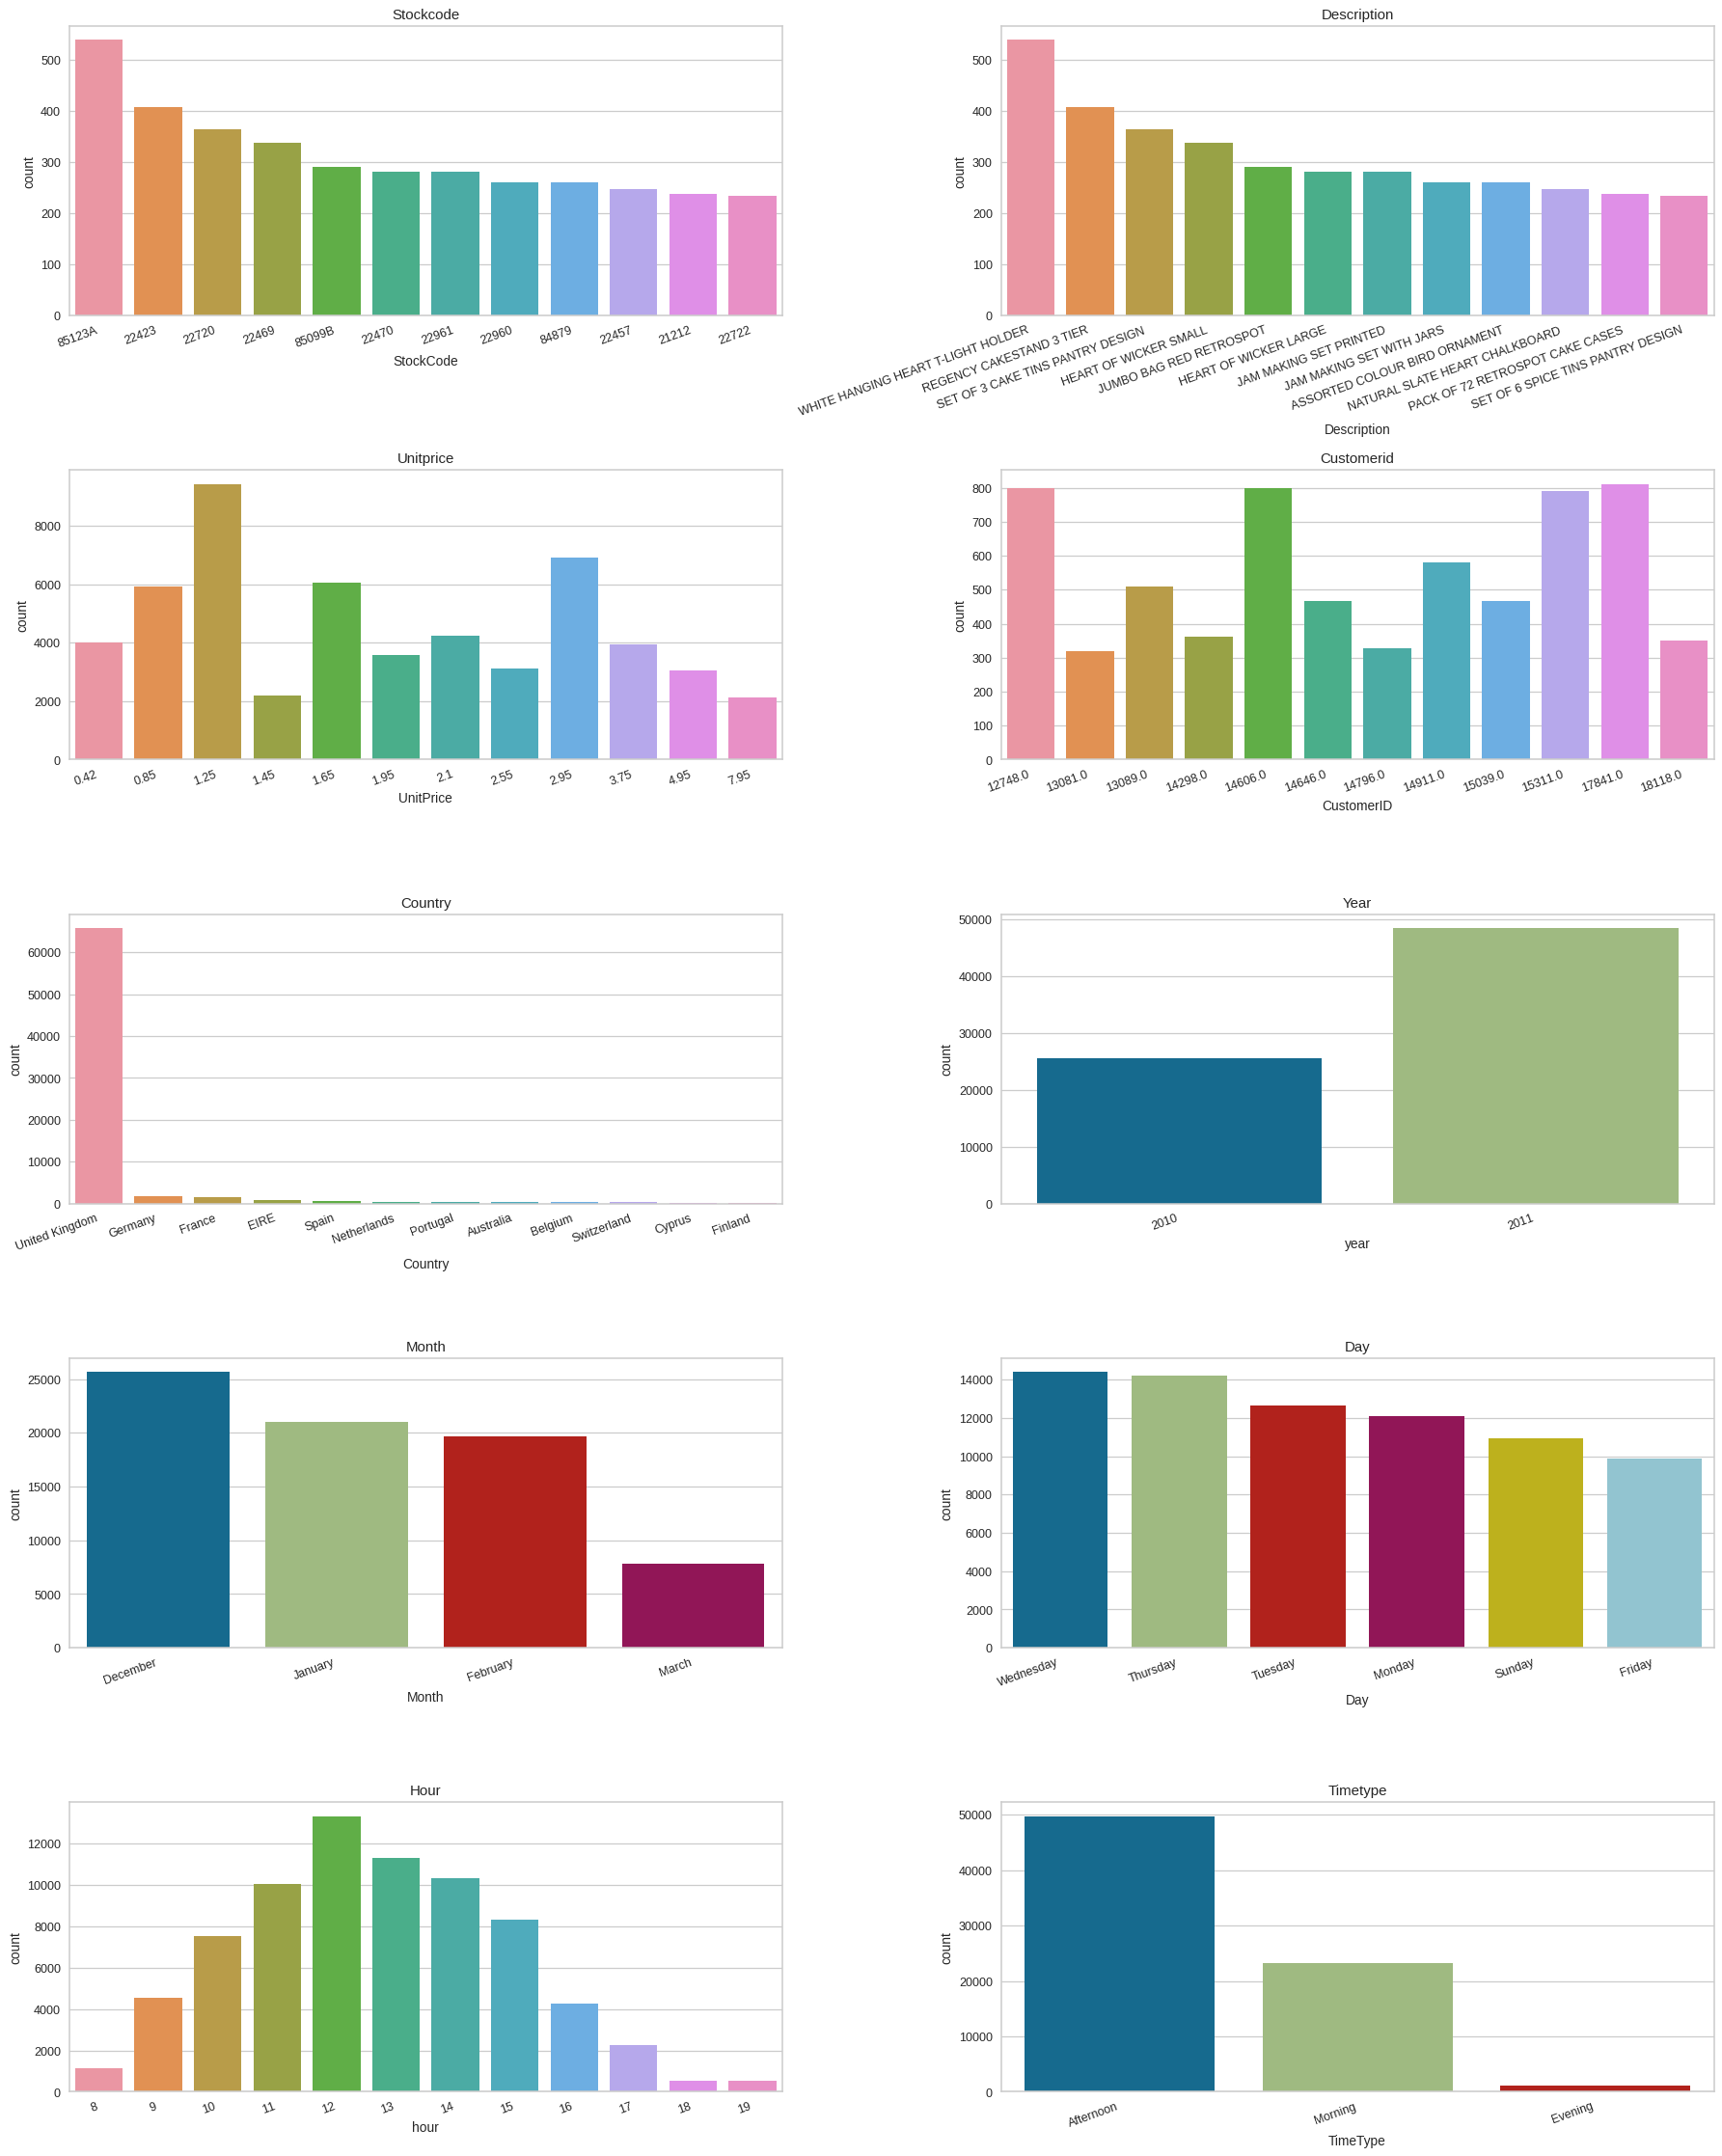

In [26]:
# Plotting top values based on frequency in each column
target = ['StockCode', 'Description','UnitPrice', 'CustomerID', 'Country',
          'year', 'Month','Day','hour','TimeType']

plt.figure(figsize=(20,25), dpi=90)
for n,col in enumerate(target):
  plt.subplot(5, 2, n+1)
  temp = df[col].value_counts().reset_index().head(12)
  temp.rename(columns={'index': col, col:'count'}, inplace=True)
  sns.barplot(x=col ,y='count', data=temp).set(title=col.title())
  plt.xticks(rotation=20,ha='right')
  plt.tight_layout()

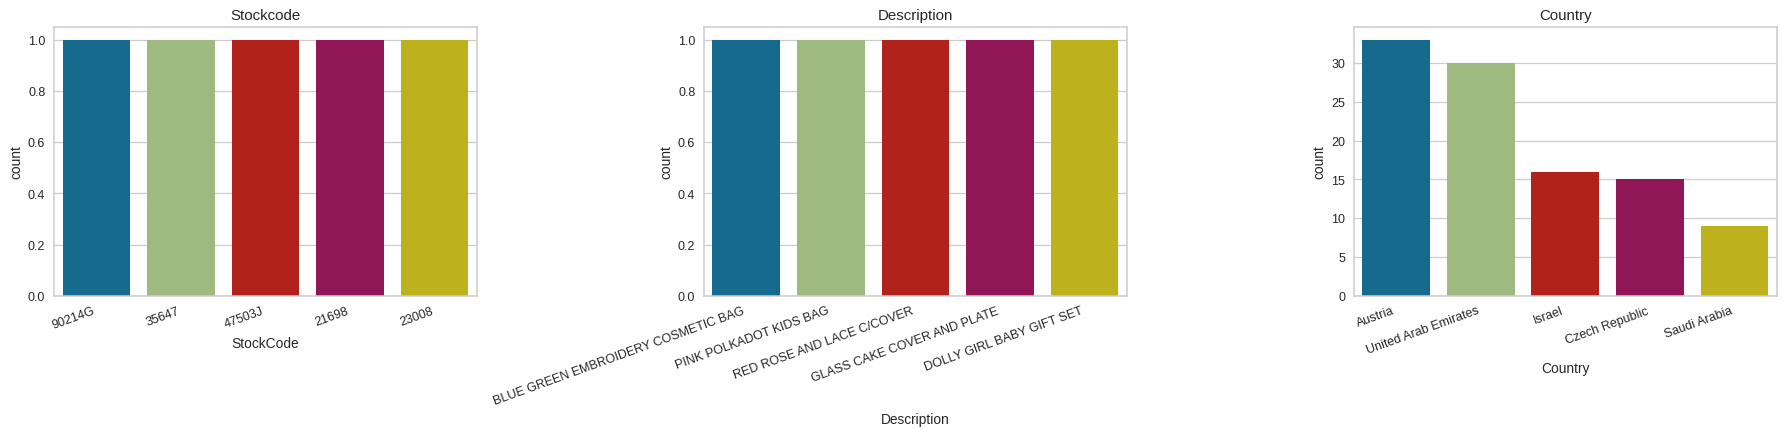

In [27]:
# Plotting Bottom values based on frequency in each column
target = ['StockCode', 'Description','Country']
plt.figure(figsize=(20,5), dpi=90)
for n,col in enumerate(target):
  plt.subplot(1, 3, n+1)
  temp = df[col].value_counts().reset_index().tail(5)
  temp.rename(columns={'index': col, col:'count'}, inplace=True)
  sns.barplot(x=col ,y='count', data=temp).set(title=col.title())
  plt.xticks(rotation=20,ha='right')
  plt.tight_layout()

# **Hypothesis From the Data Visualized:**
1. Customers primarily hail from the United Kingdom. Numerous consumers hail from other countries, including Germany, France, Ireland, and Spain. Saudi Arabia, Bahrain, the Czech Republic, Brazil, and Lithuania, on the other hand, have the fewest customers.
2. Saturdays are not a day for placing orders. It seems like the retailer is closed today.
3. The months of November, October, December, and September had the highest volume of gift purchases from customers. Customers made fewer gifts purchases in the months of April, January, and February.
4. The majority of consumers made their purchases in the afternoon, followed by a somewhat smaller number in the morning, and the smallest number in the evening.
5. The three most popular items are JUMBO BAG RED RETROSPOT, REGENCY CAKESTAND 3 TIER, and WHITE HANGING HEART T-LIGHT HOLDER.

##**Visualization**

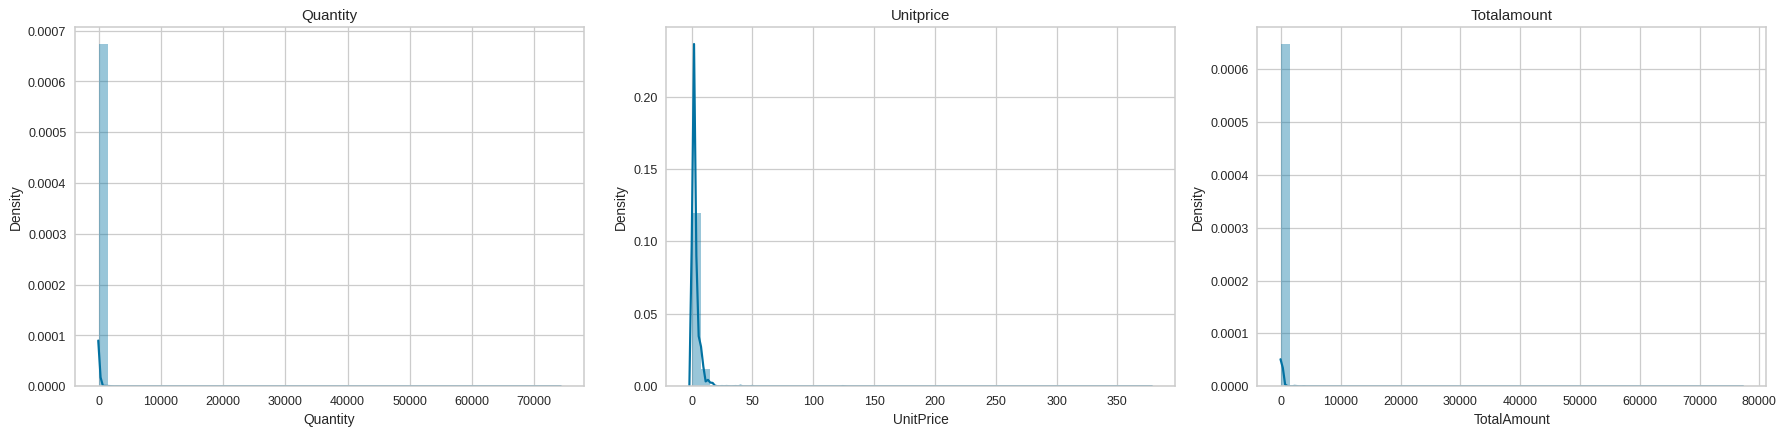

In [28]:
# Visualizing the distributions.
target = ['Quantity','UnitPrice','TotalAmount']
plt.figure(figsize=(20,5), dpi=90)
for n,col in enumerate(target):
  plt.subplot(1, 3, n+1)
  sns.distplot(df[col])
  plt.title(col.title())
  plt.tight_layout()

## **observation:**
1. It shows a positively skewed distribution because most of the values are clustered around the left side of the distribution while the right tail of the distribution is longer, which means mean>median>mode2. For symmetric graph mean=median=mode.

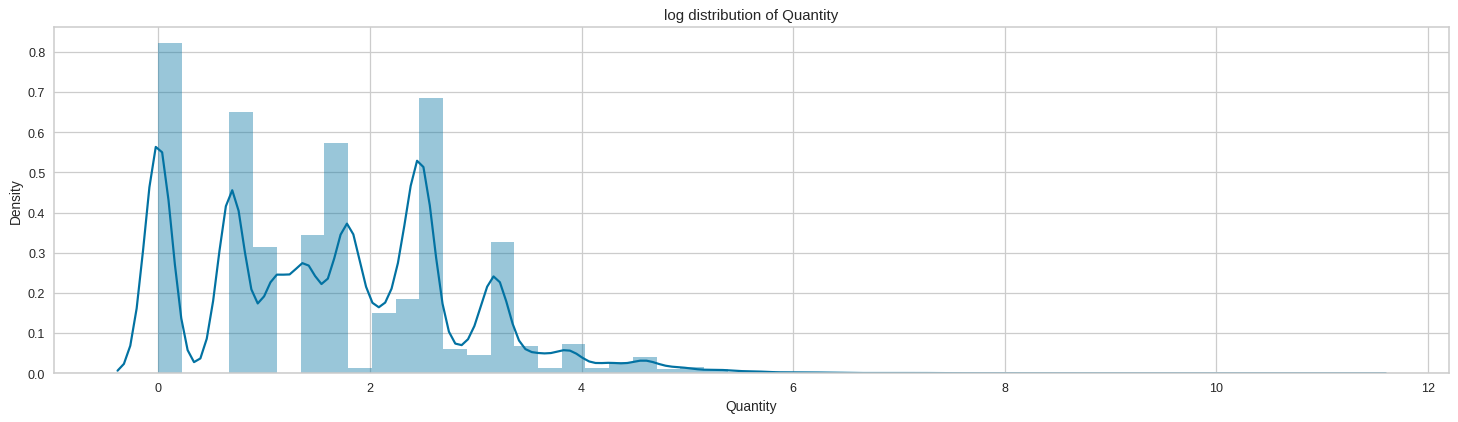

In [29]:
# Visualizing the distributions after log transformation of Quantity
plt.figure(figsize=(20,5), dpi=90)
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']))
plt.show()

In [30]:
# Most orders placed are from these countries
country_invoice = df.groupby("Country").nunique()["InvoiceNo"].reset_index().sort_values("InvoiceNo",ascending=False)
country_invoice.rename(columns={'InvoiceNo': 'Invoice_Count'}, inplace=True)
country_invoice.head(10)

Country  Invoice_Count
28  United Kingdom           3392
10         Germany             89
9           France             76
7             EIRE             34
24           Spain             18
0        Australia             18
2          Belgium             18
18     Netherlands             14
21        Portugal             13
26     Switzerland             10

United Kingdom is making most of the purchases as compared to other countries



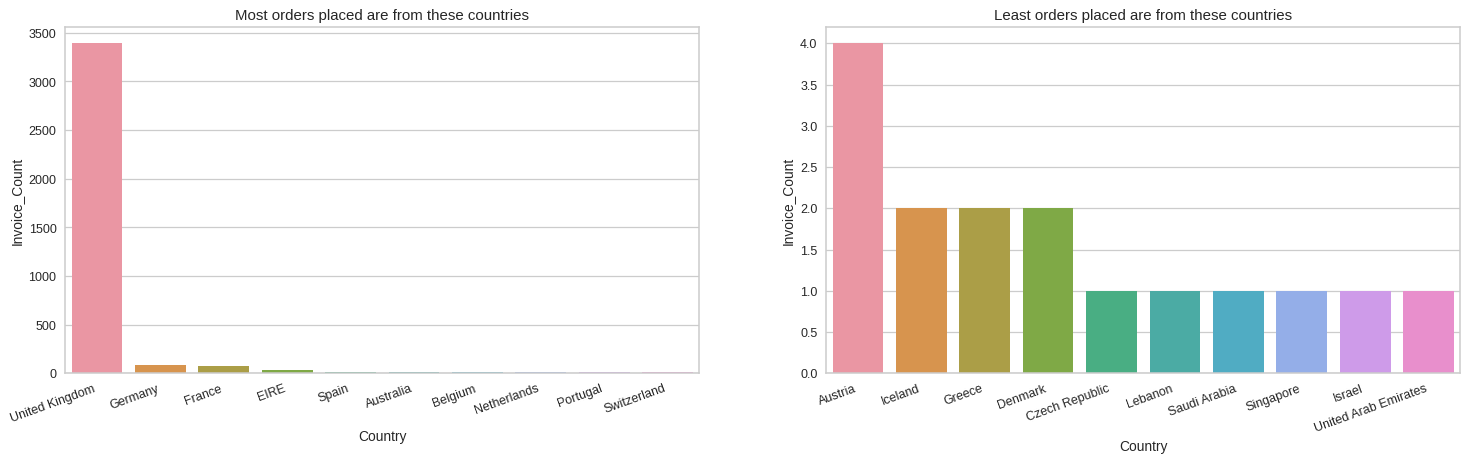

In [31]:
# Visualizing top and bottom 10 countries based on total invoices
plt.figure(figsize=(20,5),dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Most orders placed are from these countries")
sns.barplot(data=country_invoice.head(10),x="Country",y="Invoice_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Least orders placed are from these countries")
sns.barplot(data=country_invoice.tail(10),x="Country",y="Invoice_Count")
plt.show()

In [32]:
# Most customers are from these countries
country_cust = df.groupby("Country").nunique()["CustomerID"].reset_index().sort_values("CustomerID",ascending=False)
country_cust.rename(columns={'CustomerID': 'Customer_Count'}, inplace=True)
country_cust.head()

Country  Customer_Count
28  United Kingdom            1645
10         Germany              43
9           France              39
24           Spain              13
2          Belgium              11

* United Kingdom has most number of customers

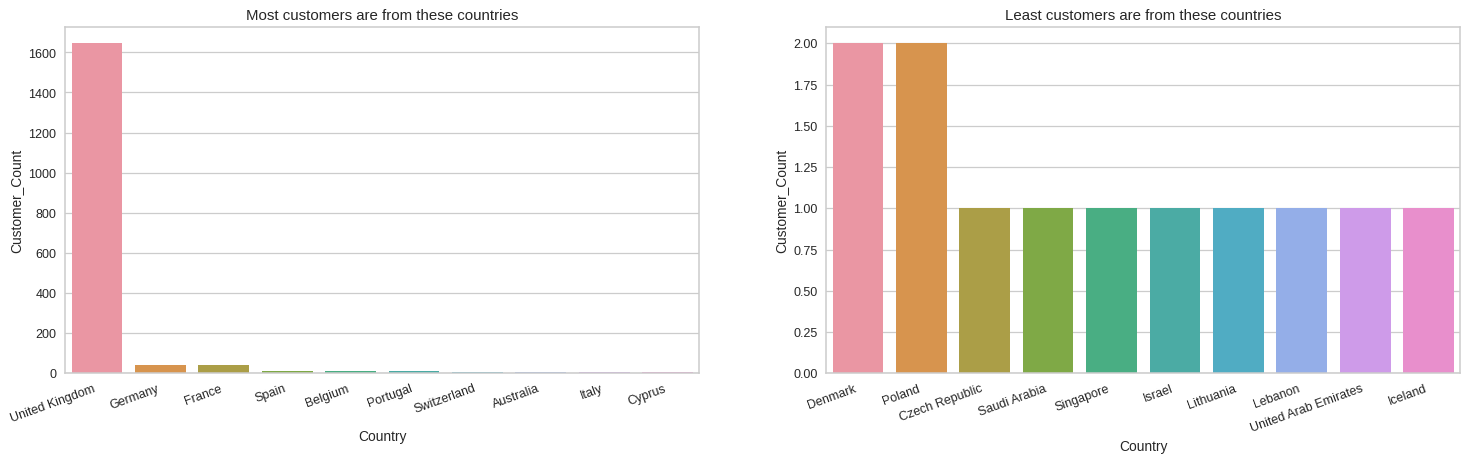

In [33]:
# Visualizing top and bottom 10 countries based on total customers
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Most customers are from these countries")
sns.barplot(data=country_cust.head(10),x="Country",y="Customer_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Least customers are from these countries")
sns.barplot(data=country_cust.tail(10),x="Country",y="Customer_Count")
plt.show()

In [34]:
# Countrywise average item purchases
country_quantity = df.groupby("Country").mean()["Quantity"].reset_index().sort_values("Quantity",ascending=False)
country_quantity.rename(columns={'Quantity': 'Average_Quantity'}, inplace=True)
country_quantity.head()

Country  Average_Quantity
25          Sweden        101.402778
18     Netherlands         84.897485
0        Australia         76.148936
15           Japan         42.849398
5   Czech Republic         23.066667

### **Orders with mass quantity are placed by the customers from Netherlands**

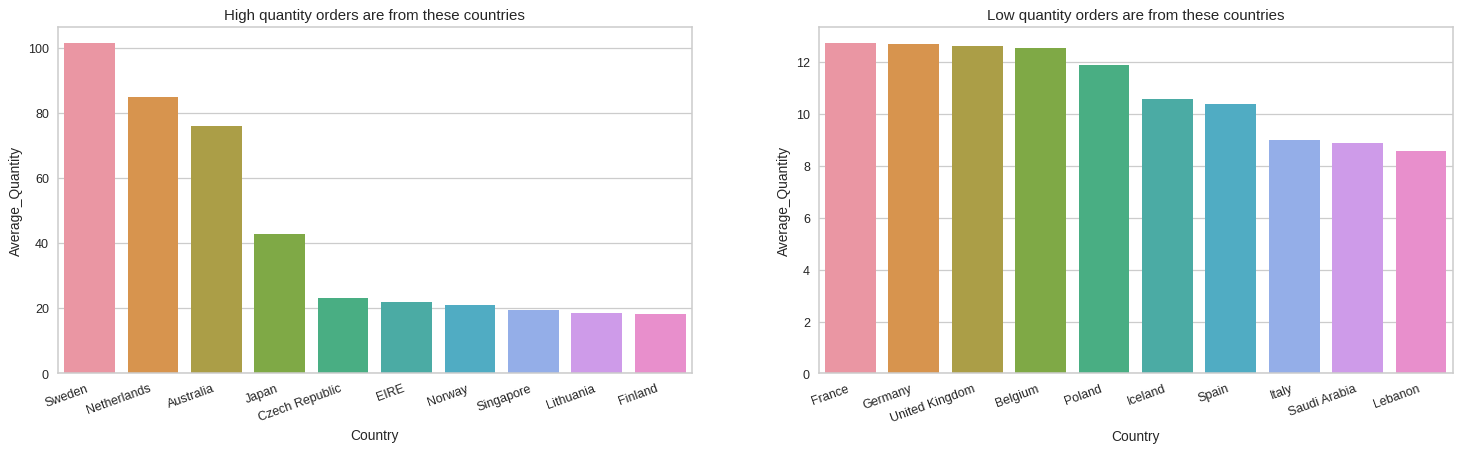

In [35]:
# Visualizing top and bottom 10 countries based on average item purchases
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("High quantity orders are from these countries")
sns.barplot(data=country_quantity.head(10),x="Country",y="Average_Quantity")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Low quantity orders are from these countries")
sns.barplot(data=country_quantity.tail(10),x="Country",y="Average_Quantity")
plt.show()

In [36]:
# quantity wise item purchases
product_quantity = df.groupby("Description").sum()["Quantity"].reset_index().sort_values("Quantity",ascending=False)
product_quantity.head()

Description  Quantity
1492      MEDIUM CERAMIC TOP STORAGE JAR   74215.0
2798   WORLD WAR 2 GLIDERS ASSTD DESIGNS   12532.0
2732  WHITE HANGING HEART T-LIGHT HOLDER   11461.0
1705     PACK OF 72 RETROSPOT CAKE CASES    9742.0
1339             JUMBO BAG RED RETROSPOT    8767.0

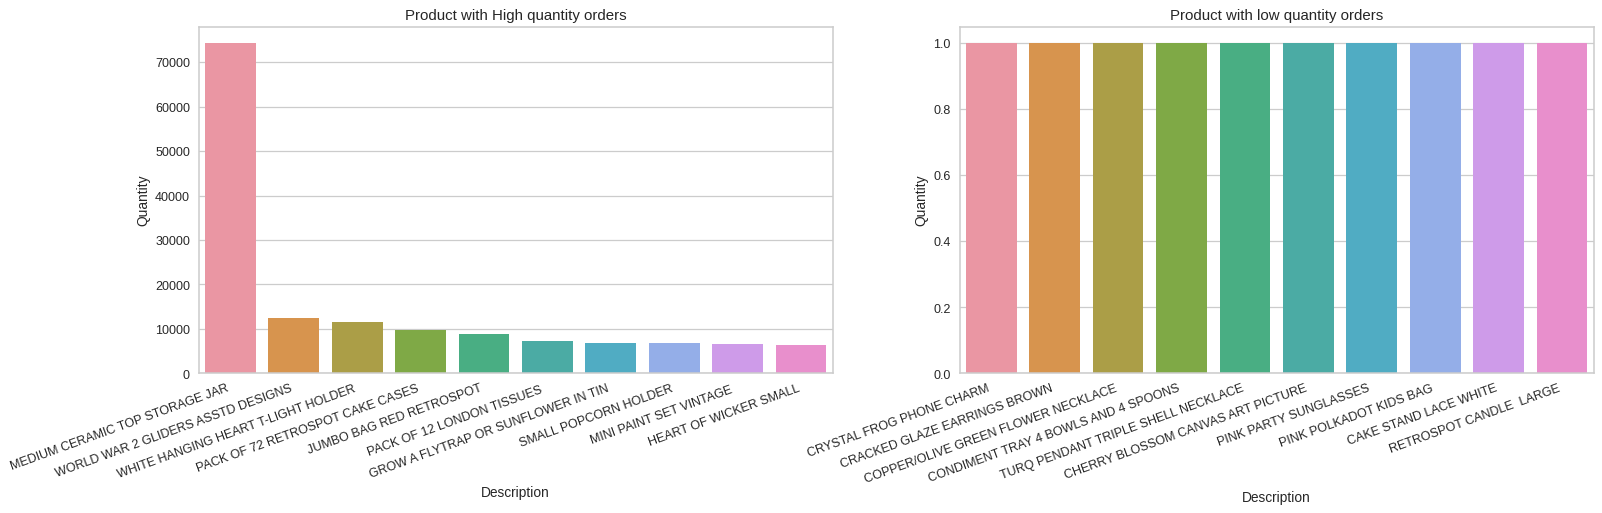

In [37]:
# Visualizing top and bottom 10 products based on purchase quantity
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product with High quantity orders")
sns.barplot(data=product_quantity.head(10),x="Description",y="Quantity")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Product with low quantity orders")
sns.barplot(data=product_quantity.tail(10),x="Description",y="Quantity")
plt.show()

In [38]:
# Amount wise item purchases
product_price = df.groupby("Description").sum()["TotalAmount"].reset_index().sort_values("TotalAmount",ascending=False)
product_price.head()

Description  TotalAmount
1492      MEDIUM CERAMIC TOP STORAGE JAR     77183.60
2087            REGENCY CAKESTAND 3 TIER     42834.45
2732  WHITE HANGING HEART T-LIGHT HOLDER     31037.25
585                        CHILLI LIGHTS     15916.51
1339             JUMBO BAG RED RETROSPOT     15317.25

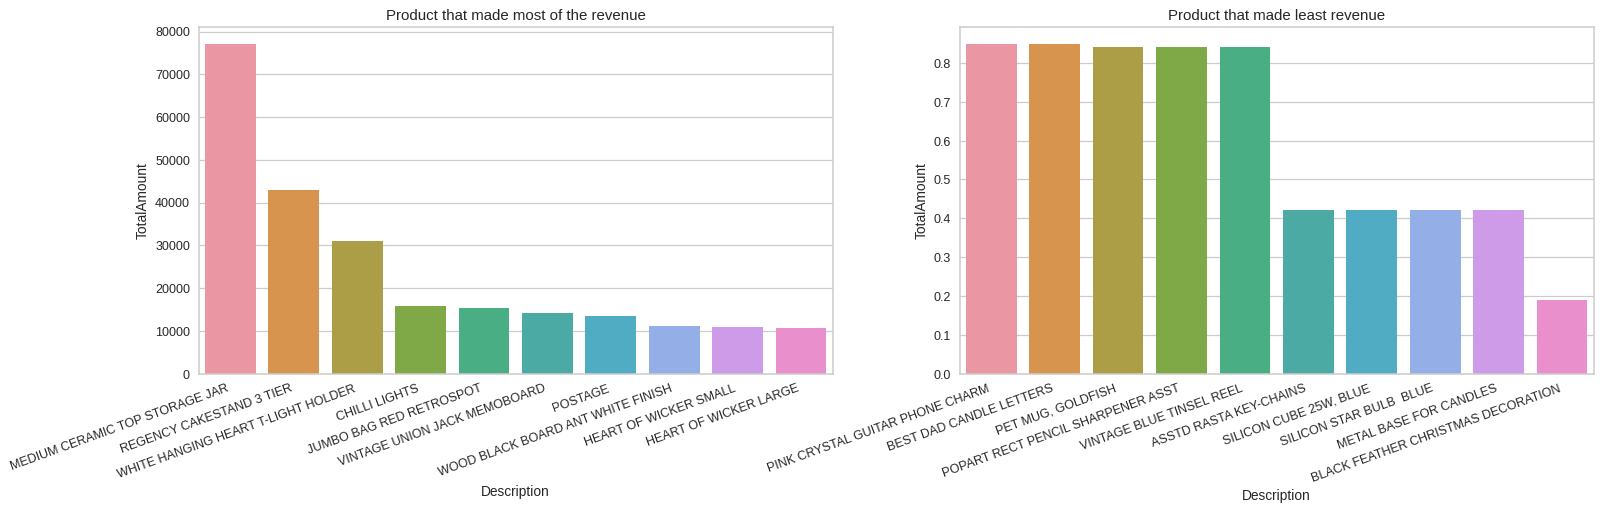

In [39]:
# Visualizing top and bottom 10 products based on amount
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product that made most of the revenue")
sns.barplot(data=product_price.head(10),x="Description",y="TotalAmount")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Product that made least revenue")
sns.barplot(data=product_price.tail(10),x="Description",y="TotalAmount")
plt.show()

In [40]:
# customer wise item purchases
product_customer = df.groupby("Description").nunique()["CustomerID"].reset_index().sort_values("CustomerID",ascending=False)
product_customer.rename(columns={'CustomerID': 'Customer_Count'}, inplace=True)
product_customer.head()

Description  Customer_Count
2732  WHITE HANGING HEART T-LIGHT HOLDER             365
2087            REGENCY CAKESTAND 3 TIER             301
2244   SET OF 3 CAKE TINS PANTRY DESIGN              289
1239               HEART OF WICKER SMALL             262
1315              JAM MAKING SET PRINTED             241

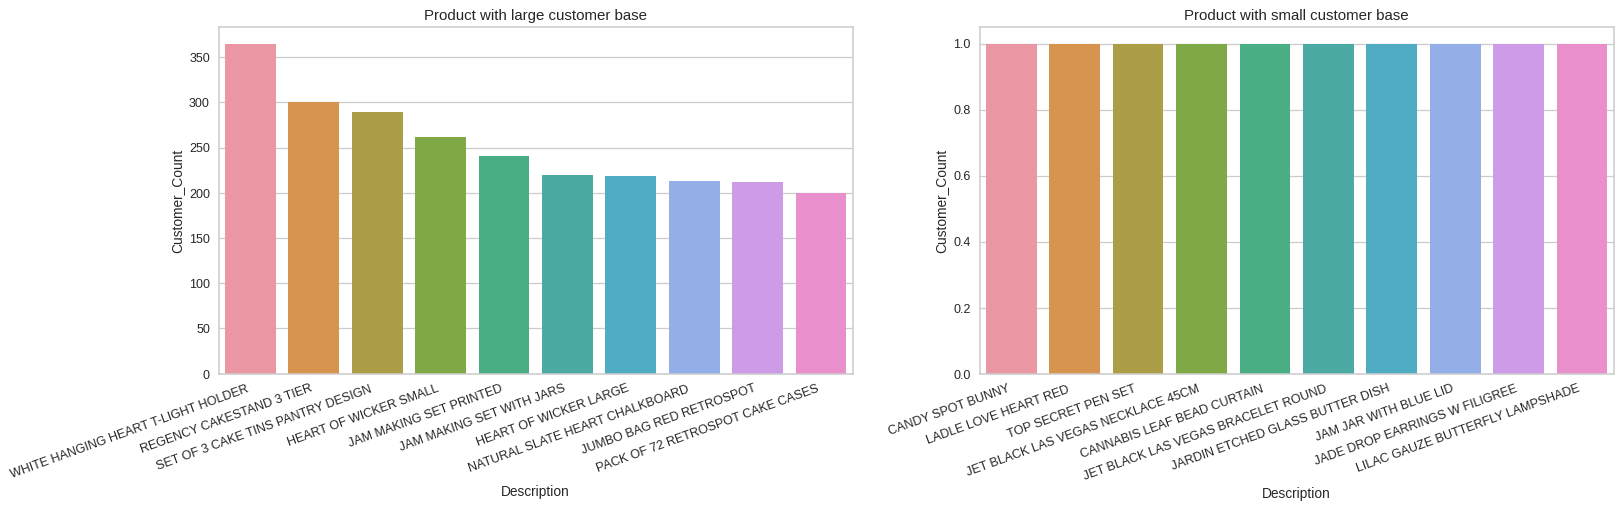

In [41]:
# Visualizing top and bottom 10 products based on customers
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("Product with large customer base")
sns.barplot(data=product_customer.head(10),x="Description",y="Customer_Count")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("Product with small customer base")
sns.barplot(data=product_customer.tail(10),x="Description",y="Customer_Count")
plt.show()

In [42]:
# Checking the number of cancellations by each customer.
customer_cancellations = cancellations.groupby('CustomerID').count()['InvoiceNo'].reset_index().sort_values("InvoiceNo",ascending=False)
customer_cancellations.rename(columns={'InvoiceNo': 'Cancellations'}, inplace=True)
customer_cancellations.head()

CustomerID  Cancellations
154     13798.0             44
273     14911.0             43
505     17511.0             37
14      12471.0             36
181     14146.0             35

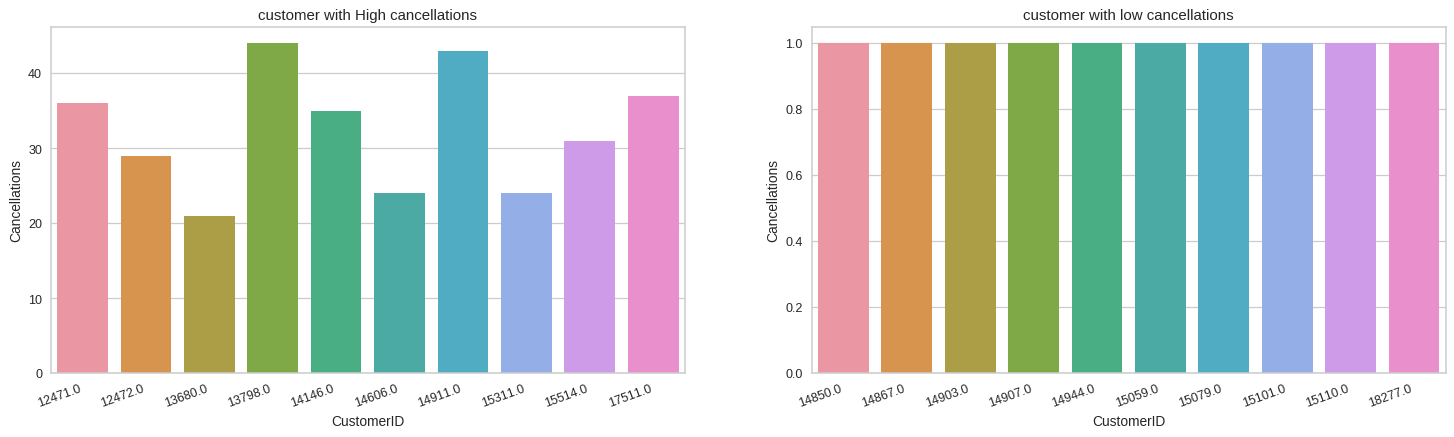

In [43]:
# Visualizing top and bottom 10 customers based on cancellations
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("customer with High cancellations")
sns.barplot(data=customer_cancellations.head(10),x="CustomerID",y="Cancellations")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("customer with low cancellations")
sns.barplot(data=customer_cancellations.tail(10),x="CustomerID",y="Cancellations")
plt.show()

In [44]:
# Checking the number of cancellations countrywise.
country_cancellations = cancellations.groupby('Country').count()['InvoiceNo'].reset_index().sort_values("InvoiceNo",ascending=False)
country_cancellations.rename(columns={'InvoiceNo': 'Cancellations'}, inplace=True)
country_cancellations.head()

Country  Cancellations
18  United Kingdom           1675
7          Germany            154
5             EIRE             51
6           France             31
10           Japan             12

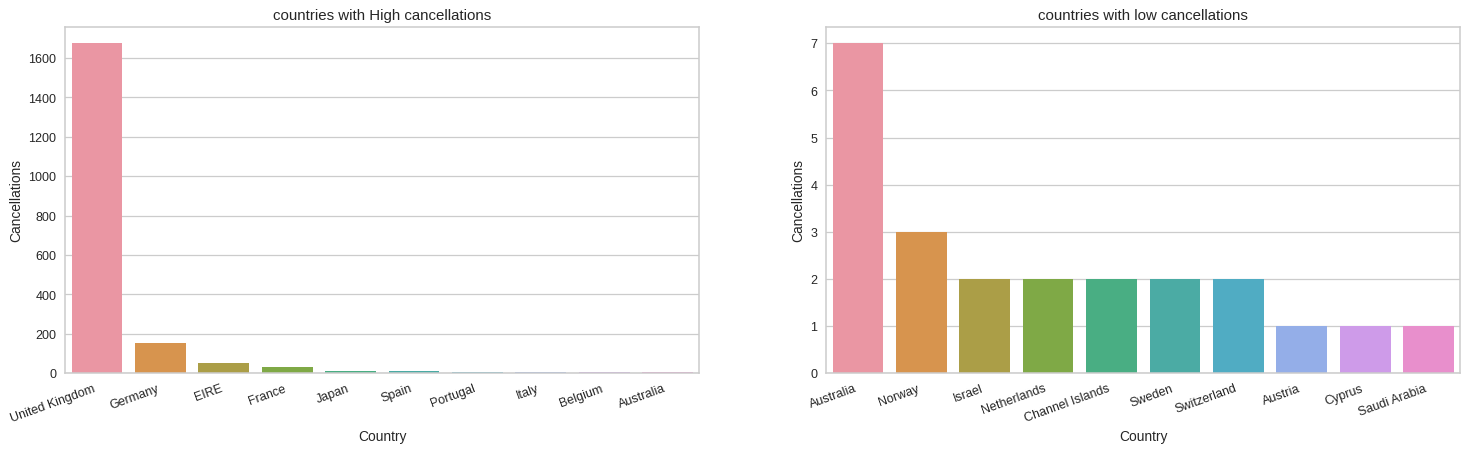

In [45]:
# Visualizing top and bottom 10 countries based on cancellations
plt.figure(figsize=(20,5), dpi=90)
plt.subplot(1,2,1)
plt.xticks(rotation=20,ha='right')
plt.title("countries with High cancellations")
sns.barplot(data=country_cancellations.head(10),x="Country",y="Cancellations")

plt.subplot(1,2,2)
plt.xticks(rotation=20,ha='right')
plt.title("countries with low cancellations")
sns.barplot(data=country_cancellations.tail(10),x="Country",y="Cancellations")
plt.show()

# **RFM Modelling**

A statistical method known as RFM (Recency, Frequency, Monetary) modelling is used in marketing and customer relationship management to analyse consumer behaviour and estimate the value of each individual customer to a company. It entails classifying clients based on their purchasing patterns after analysing their transactional data.

How recently a consumer has made a purchase from the company is referred to as recency. The terms "frequency" and "monetary" describe how frequently and how much money a client spends on purchases, respectively. Each consumer is given a score based on these three variables, which are then used to divide them into several groups.

Customers who have recently made purchases, buy frequently, and spend more money are typically thought to be more valuable to the company than those who haven't recently made purchases, buy sparingly, and spend less money. RFM modelling enables companies to identify their most important clients and adjust their marketing strategies accordingly, for example by providing individualised promotions or enhancing client relations.

Different statistical methods, such as clustering or decision tree analysis, can be used to carry out RFM modelling. The results may need to be routinely evaluated and updated to reflect changes in client behaviour, and it necessitates reliable and current data on customer transactions.


In [46]:
# Adding 1 day to the Last Invoice date to set as Latest date for reference
LatestDate = df["InvoiceDate"].max() + pd.DateOffset(days=1)

# Creating a new dataframe to calculate Recency, Frequency and Monetary scores for each customer
rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (LatestDate - x.max()).days,
                                    'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

# Renaming the columns
rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency',
                    'TotalAmount': 'Monetary'}, inplace=True)

# Checking top 5 rows
rfm.reset_index().head()

CustomerID  Recency  Frequency  Monetary
0     12346.0       51          1  77183.60
1     12347.0       43         60   1187.18
2     12348.0       44         23   1120.24
3     12350.0       35         17    334.40
4     12352.0        8         23   1281.15

In [47]:
# Calculating R, F and M scores by splitting Recency, Frequency	and Monetary based on quantiles
rfm['R'] = pd.qcut(rfm['Recency'], q=4, labels=[4,3,2,1]).astype(int)
rfm['F'] = pd.qcut(rfm['Frequency'], q=4, labels=[1,2,3,4]).astype(int)
rfm['M'] = pd.qcut(rfm['Monetary'], q=4, labels=[1,2,3,4]).astype(int)

In [48]:
# Finding the RFM Group for each customer by combining the factors R,Fand M
rfm['RFM'] = 100*rfm['R'] + 10*rfm['F'] + rfm['M']

# Finding the RFM Score for each customer by adding the factors R,Fand M
rfm['RFM_Score'] = rfm['R'] + rfm['F'] + rfm['M']

# **Interpretation:**
1. If any customer's RFM is 444. His recentness, frequency, and financial standing are all strong. He is the ideal client, therefore.
2. If any customer's RFM is 111. His frequency, recency, and financial all show low levels. He is the consumer who keeps churning.
3. If any customer's RFM is 144. He made a long-ago purchase, yet he buys frequently and spends more money. so forth.
4. Based on our usecase, we can calculate the number of segments for all possible combinations of R, F, and M. The consumer is worth more when the RFM score is higher.

In [49]:
# Handling the zeroes in the dataframe to avoid error in transformations
rfm.replace(0.0,1,inplace=True)

# Applying Log transformation on columns for smoothening the distribution
rfm['Recency_Log']   = rfm['Recency'].apply(np.log)
rfm['Frequency_Log'] = rfm['Frequency'].apply(np.log)
rfm['Monetary_Log']  = rfm['Monetary'].apply(np.log)
rfm.head()

Recency  Frequency  Monetary  R  F  M  RFM  RFM_Score  \
CustomerID                                                          
12346.0          51          1  77183.60  2  1  4  214          7   
12347.0          43         60   1187.18  2  4  4  244         10   
12348.0          44         23   1120.24  2  2  4  224          8   
12350.0          35         17    334.40  3  2  2  322          7   
12352.0           8         23   1281.15  4  2  4  424         10   

            Recency_Log  Frequency_Log  Monetary_Log  
CustomerID                                            
12346.0        3.931826       0.000000     11.253942  
12347.0        3.761200       4.094345      7.079336  
12348.0        3.784190       3.135494      7.021298  
12350.0        3.555348       2.833213      5.812338  
12352.0        2.079442       3.135494      7.155513

In [50]:
# Checking Descriptive Stats
rfm.describe()

Recency    Frequency      Monetary            R            F  \
count  1828.000000  1828.000000   1828.000000  1828.000000  1828.000000   
mean     41.254376    40.597921    956.795848     2.516411     2.490700   
std      31.245402    59.715433   3136.815888     1.122616     1.118791   
min       1.000000     1.000000      0.850000     1.000000     1.000000   
25%      14.000000    11.000000    211.270000     2.000000     1.000000   
50%      35.000000    23.000000    392.880000     3.000000     2.000000   
75%      62.000000    49.000000    829.015000     4.000000     3.000000   
max      99.000000   812.000000  77183.600000     4.000000     4.000000   

                M          RFM    RFM_Score  Recency_Log  Frequency_Log  \
count  1828.00000  1828.000000  1828.000000  1828.000000    1828.000000   
mean      2.50000   279.048140     7.507112     3.273396       3.099910   
std       1.11834   115.635305     2.580813     1.130206       1.161787   
min       1.00000   111.000000     3.000000     0.000000       0.000000   
25%       1.75000   211.000000     5.000000     2.639057       2.397895   
50%       2.50000   311.000000     7.000000     3.555348       3.135494   
75%       3.25000   411.000000    10.000000     4.127134       3.891820   
max       4.00000   444.000000    12.000000     4.595120       6.699500   

       Monetary_Log  
count   1828.000000  
mean       6.073980  
std        1.087423  
min       -0.162519  
25%        5.353137  
50%        5.973504  
75%        6.720238  
max       11.253942

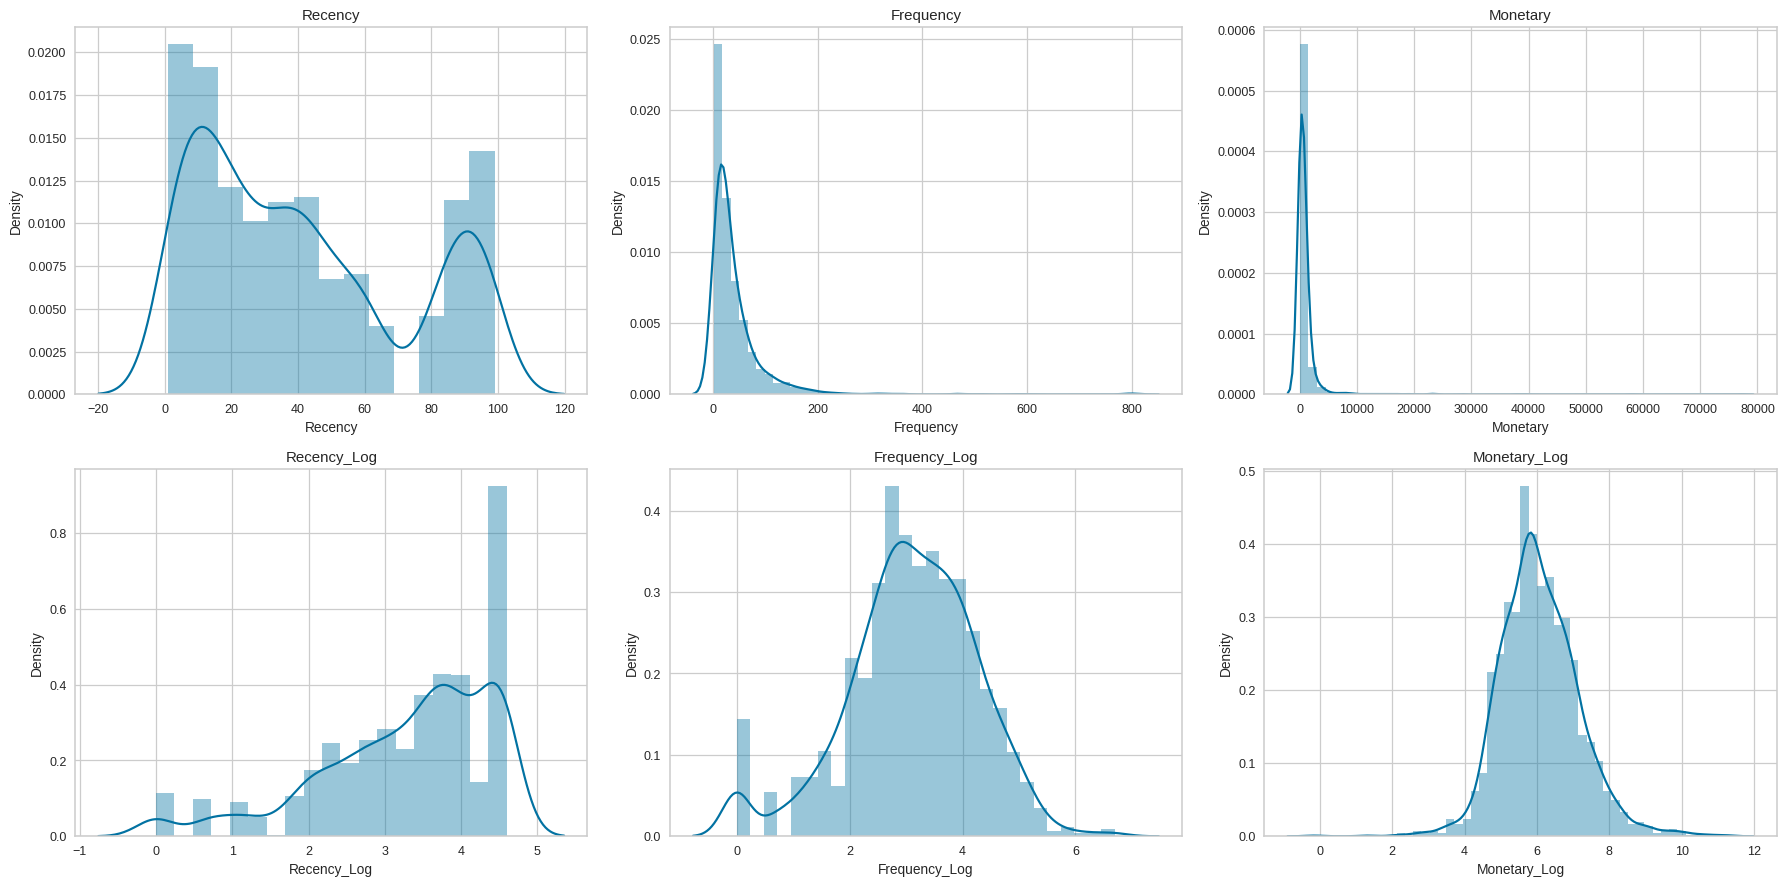

In [51]:
# Visualizing the distributions before and after log transformation.
target = ['Recency', 'Frequency',	'Monetary', 'Recency_Log', 'Frequency_Log', 'Monetary_Log']
plt.figure(figsize=(20,10), dpi=90)
for n,col in enumerate(target):
  plt.subplot(2, 3, n+1)
  sns.distplot(rfm[col])
  plt.title(col.title())
  plt.tight_layout()

# **Observations:**
1. Prior to applying the log transformation, the distributions of the Recency, Frequency, and Monetary columns were positively skewed. However, the distributions now appear to be symmetrical and normally distributed.
2. Using the transformed characteristics will be more appropriate for improving cluster visualisation.


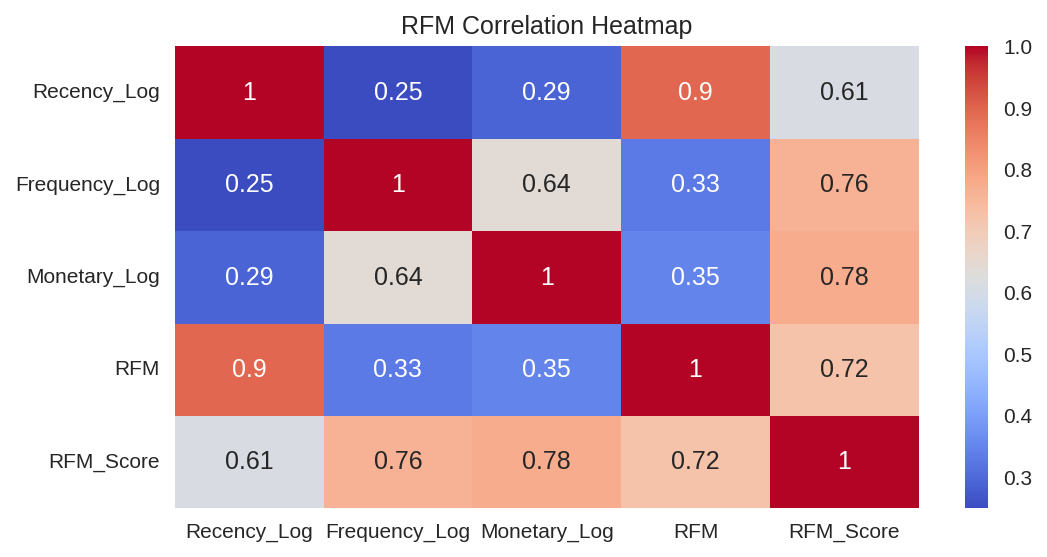

In [52]:
# Visualizing the correlations among features.
target = ['Recency_Log','Frequency_Log','Monetary_Log','RFM','RFM_Score']
plt.figure(figsize = (8, 4), dpi=150)
sns.heatmap(abs(rfm[target].corr()), annot=True, cmap='coolwarm')
plt.title('RFM Correlation Heatmap')
plt.show()

# **Clustering Algorithms**

# **Prerequisites**

In [53]:
# Defining X Variables
X = rfm[['Recency_Log','Frequency_Log','Monetary_Log']]
X = StandardScaler().fit_transform(X)

In [54]:
 # Initializing an empty dictionary to store the stats and summary for all clusters
conclusion={}

# Definin a function to remove the outliers
def cap_outliers(col,overlap_supress):
  '''
    Takes a column and removes the outliers based on the overlap_supress value
    col: column to be cleaned
    overlap_supress: value to be used to remove the outliers
    Type:
    col: pandas.Series
    overlap_supress: float

    Returns:Capped column with outliers removed
  '''
  condition1=col < col.quantile(1-overlap_supress)
  condition2=col > col.quantile(overlap_supress)
  return col[condition1 & condition2]

# Function for displaying the stats of Recency, Frequency and Monetary for each group
def cluster_stats(data, segment_name):
  '''
    Type:data: pandas.DataFrame
    Type:segment_name: str
    Returns: pandas.DataFrame
    Features:This function prints the mean median and count of Recency, Frequency and Monetary for each group
    This function prints 0.25th and 0.75th Quantile of Recency, Frequency and Monetary for each group
  '''
  # Storing the mean median and count of Recency, Frequency and Monetary for each group
  stats = data[["Recency","Frequency","Monetary",segment_name]].groupby(segment_name).agg(['mean','median'])
  stats['Count'] = data[segment_name].value_counts()

  # Storing 0.25th and 0.75th Quantile of Recency, Frequency and Monetary for each group
  summary = data[["Recency","Frequency","Monetary",segment_name]].groupby(segment_name).agg({
          "Recency"   :lambda x : f'{int(x.quantile(0.25))} to {int(x.quantile(0.75))} days ago',
          "Frequency" :lambda x : f"Bought {int(x.quantile(0.25))} to {int(x.quantile(0.75))} times",
          "Monetary"  :lambda x : f"Spent around {int(x.quantile(0.25))} to {int(x.quantile(0.75))} Sterling"})

  # Changing the name for the columns
  stats.columns = [f'{i}_{j}' for i, j in stats.columns]
  summary.columns=["Last_visited",'Purchase_frequency',"Money_spent"]

  return stats, summary

# Defining a function for plotting clusters for Visualization
def plots_stats_summary(y, segment_name, er,title, overlap_supress=0.2):
  '''
  Arguments:
    Type:y: pandas.Series
    Type:title: str
    Type:segment_name: str
    Type:overlap_supress: float
  Returns: Array of DataFrames
  features:This function plots the clusters for the given data and returns the dataframes for the clusters with conclusions and stats
  '''
  rfm[segment_name] = y                                               # Copying segment values to main data frame
  groups = sorted(rfm[segment_name].unique())                         # store legends for features.
  # Calling the cluster_stats Function and saving outputs into variable
  stats, summary = cluster_stats(rfm,segment_name)

  # PART 1 : Visyualizing the scatter plots for all clusters
  plt.figure(figsize = (18, 6), dpi=90)                               # Setting the size of the figure
  ax = plt.axes(projection ="3d")                                     # initializing axes
  ax.set_xlabel('Recency', fontweight ='bold')                        # Setting X label
  ax.set_ylabel('Frequency', fontweight ='bold')                      # Setting Y label
  ax.set_zlabel('Monetary', fontweight ='bold')                       # Setting Z label
  ax.set_title(title, fontweight ='bold')                             # Setting main title
  ax = ax.scatter(X[:, 0], X[:, 1], X[:, 2] ,c=y, cmap='viridis')     # Plotting scatter plot in 3 dimensions
  plt.legend(*ax.legend_elements(),prop={'size': 15})                 # positioning legend

  # PART 2 : Plotting the distribution
  fig,ax = plt.subplots(3,figsize=(18, 18), dpi=90)                  # Setting the size of the figure
  # Running a for loop for iterating through the number of clusters
  for i in groups:
    # Running a for loop for iterating through columns
    for index, col in enumerate(["Recency", "Frequency", "Monetary"]):
      # Plotting distributions of Recency, Frequency and Monetary
      sns.distplot(cap_outliers(rfm[rfm[segment_name]==i][col], overlap_supress),ax=ax[index] ,kde_kws=dict(linewidth=5))
      ax[index].set_title(f'{col} Distribution', fontweight ='bold')  # Setting the main title
      ax[index].legend(groups,prop={'size': 15})                      # Assiging legends for all the axes
  plt.show()

  # PART 3 : # Displaying the stats and summary
  # Displaying the mean median and count of Recency, Frequency and Monetary for each group
  print('\n\nDisplaying the mean median and count of Recency, Frequency and Monetary for each group with the description:\n')
  display(stats.reset_index().style.hide_index().background_gradient(cmap=er))
  display(summary.reset_index().style.set_properties(**{'text-align': 'left'}).hide_index().background_gradient(cmap=er))

  return stats, summary

# **Binning RFM_Score**

Recency, Frequency, and Monetary (RFM) score binning involves segmenting or binning clients according to their RFM scores. RFM ratings are frequently employed in customer segmentation because they offer insightful information about consumer behaviour and can be used to spot high-value clients, regular buyers, and possible churners.


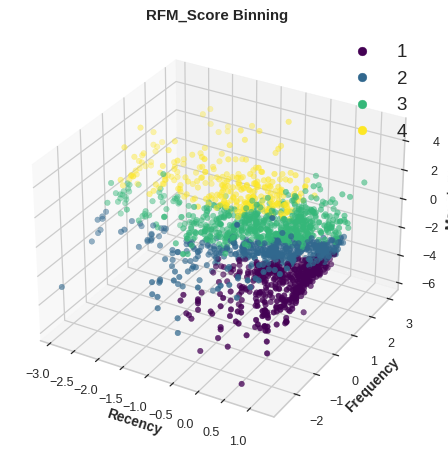

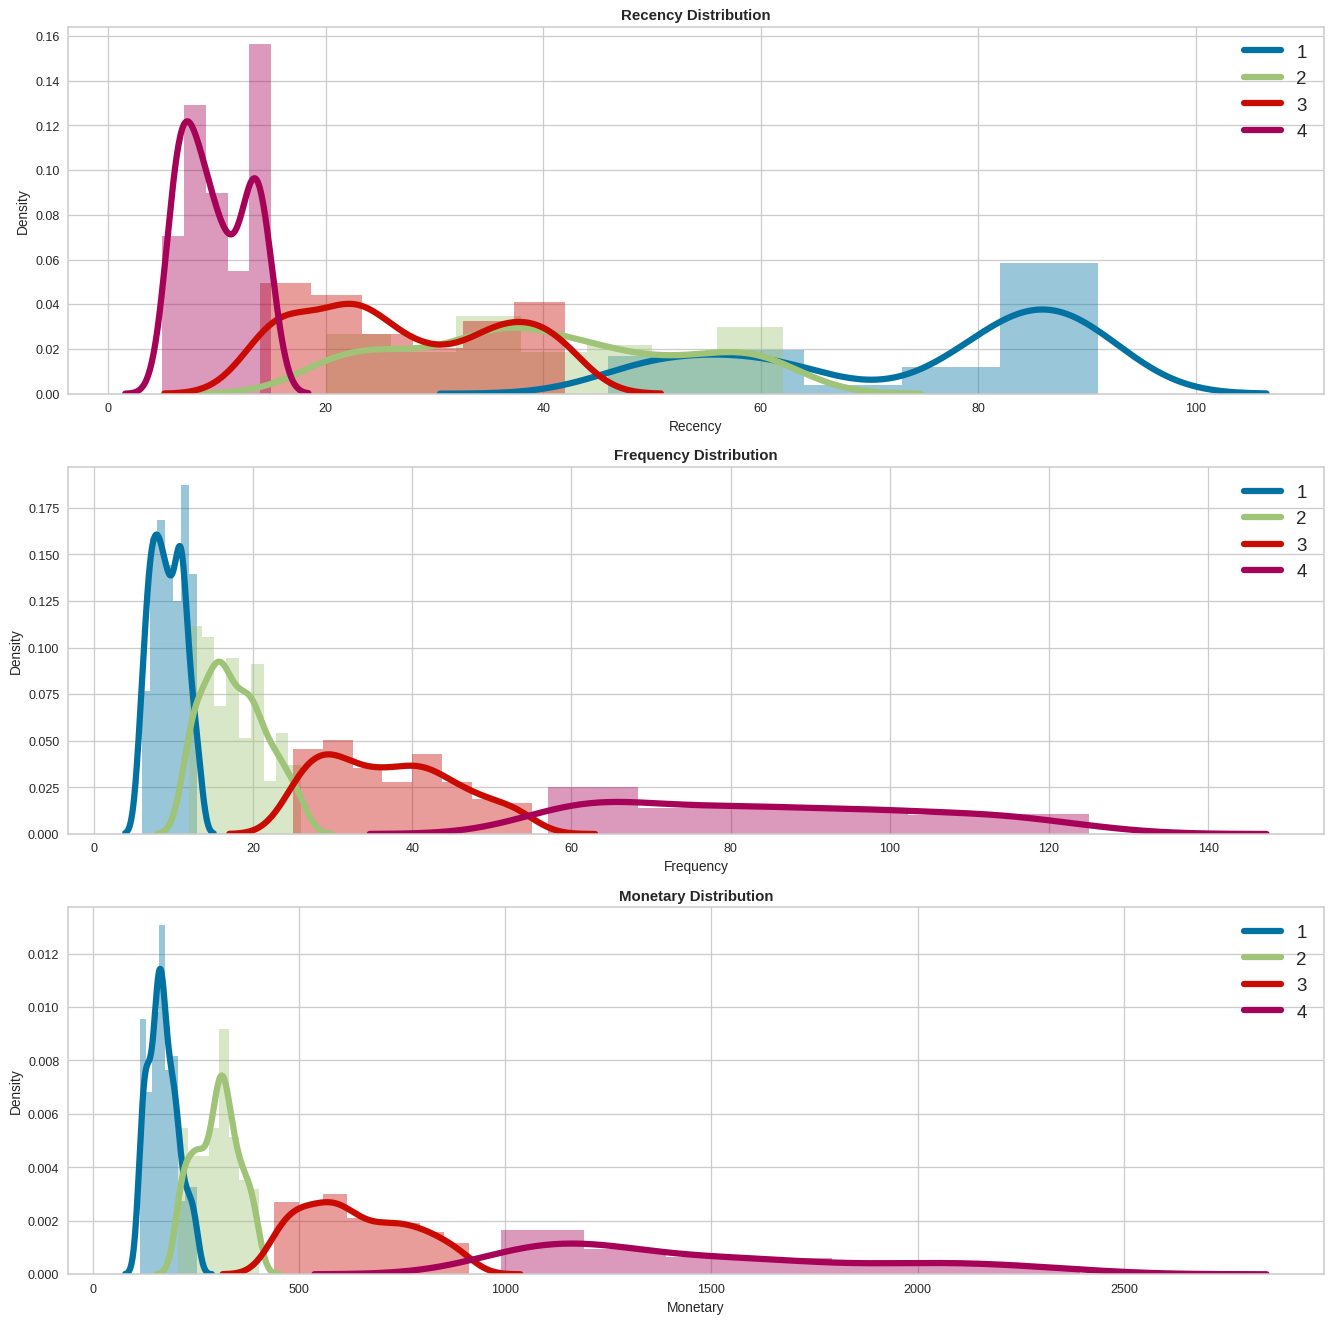



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



In [55]:
# Splitting RFM_Score in 4 bins based on quantiles
y = pd.qcut(rfm['RFM_Score'], q=4, labels=[1,2,3,4]).astype(int)

# Plotting Segments for Visualization
title = 'RFM_Score Binning'
segment_name = 'Binning'
overlap_supress = 0.25
color='Oranges'
conclusion[segment_name] = plots_stats_summary(y, segment_name, color,title, overlap_supress)

# **Quantile Based Clustering**

A clustering method called quantile-based clustering puts data points into clusters according to how they are distributed within quantiles. A dataset is divided into equal-sized groups using quantile values. The median, for instance, is the second quantile or the 50%.


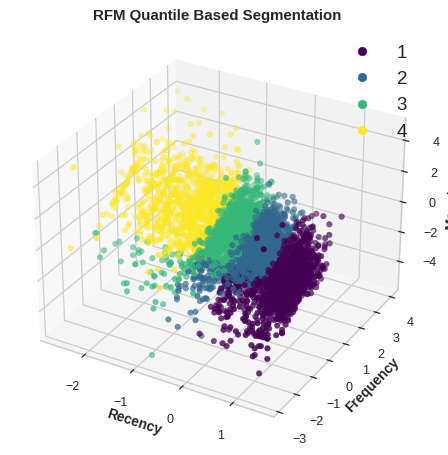

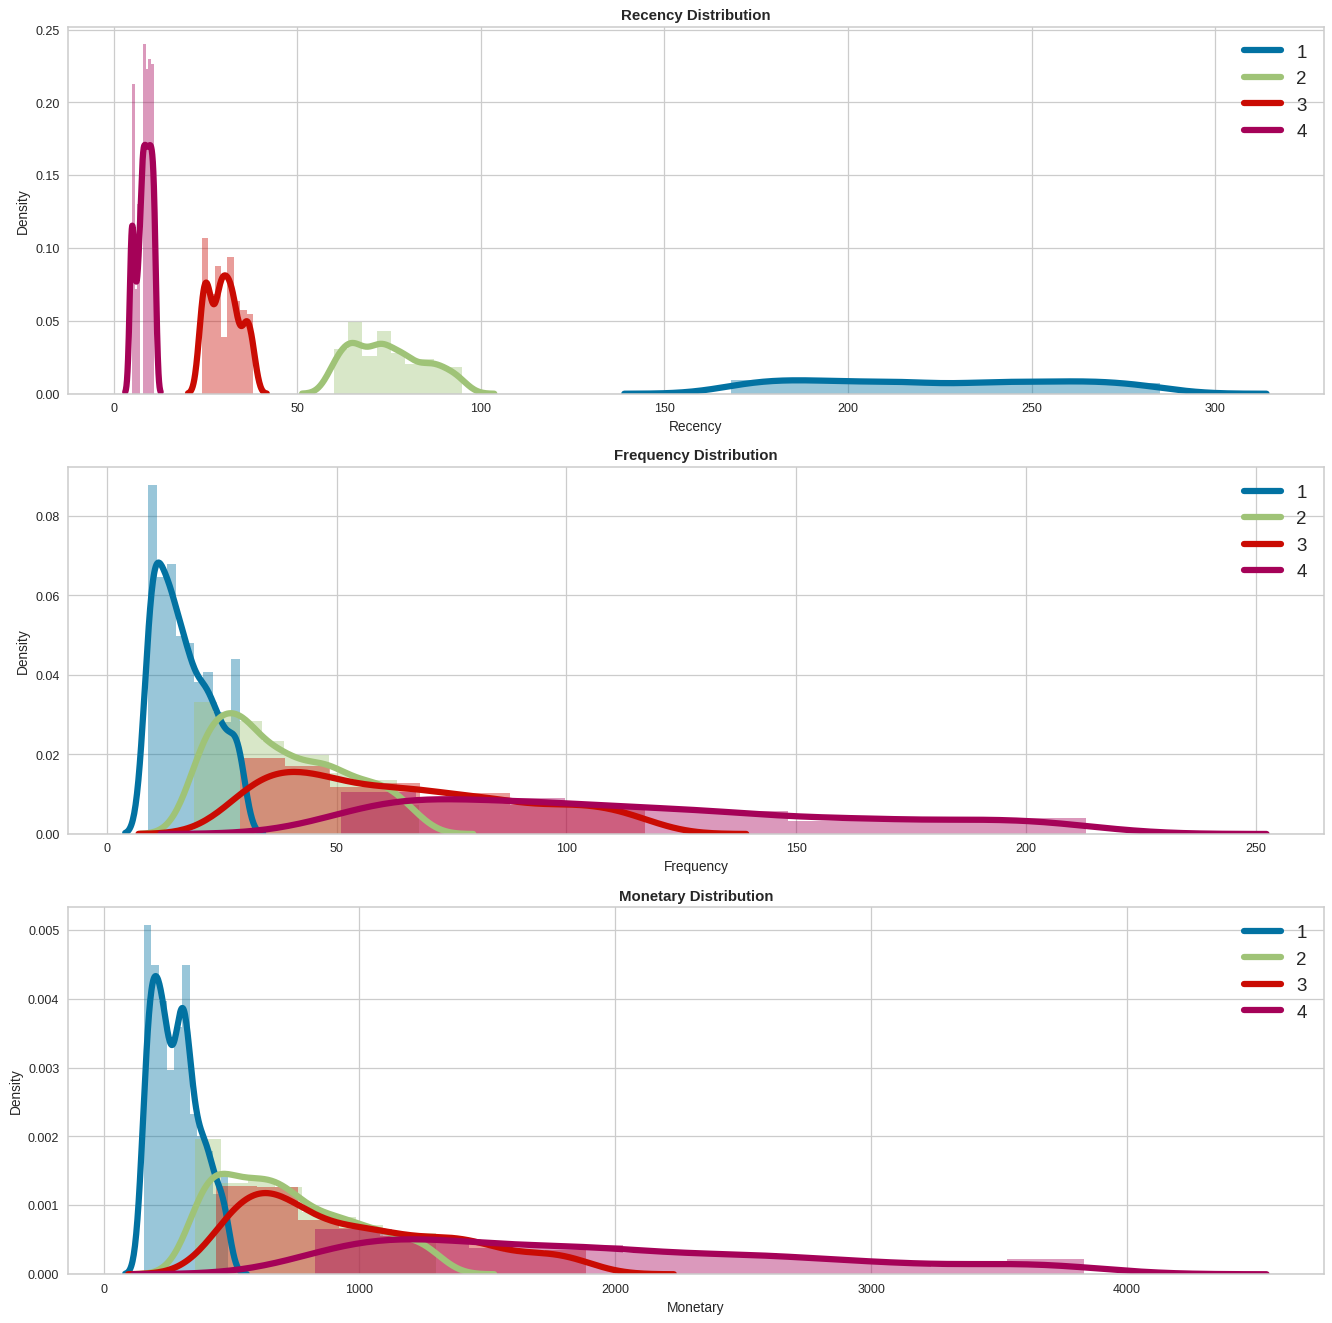



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



In [ ]:
# Splitting RFM in 4 segments based on quantiles to obtain segments
y = pd.qcut(rfm['RFM'], q=4, labels=[1,2,3,4]).astype(int)

# Plotting Segments for Visualization
title = 'RFM Quantile Based Segmentation'
segment_name = 'QuantileCut'
overlap_supress = 0.25
color='BuPu'
conclusion[segment_name] = plots_stats_summary(y, segment_name, color,title, overlap_supress)

# **K-Means Clustering**

A well-liked unsupervised machine learning approach for clustering or grouping data points according to their similarity is K-means clustering. A dataset will be divided into K clusters using this partition-based clustering technique, where K is a predetermined number.


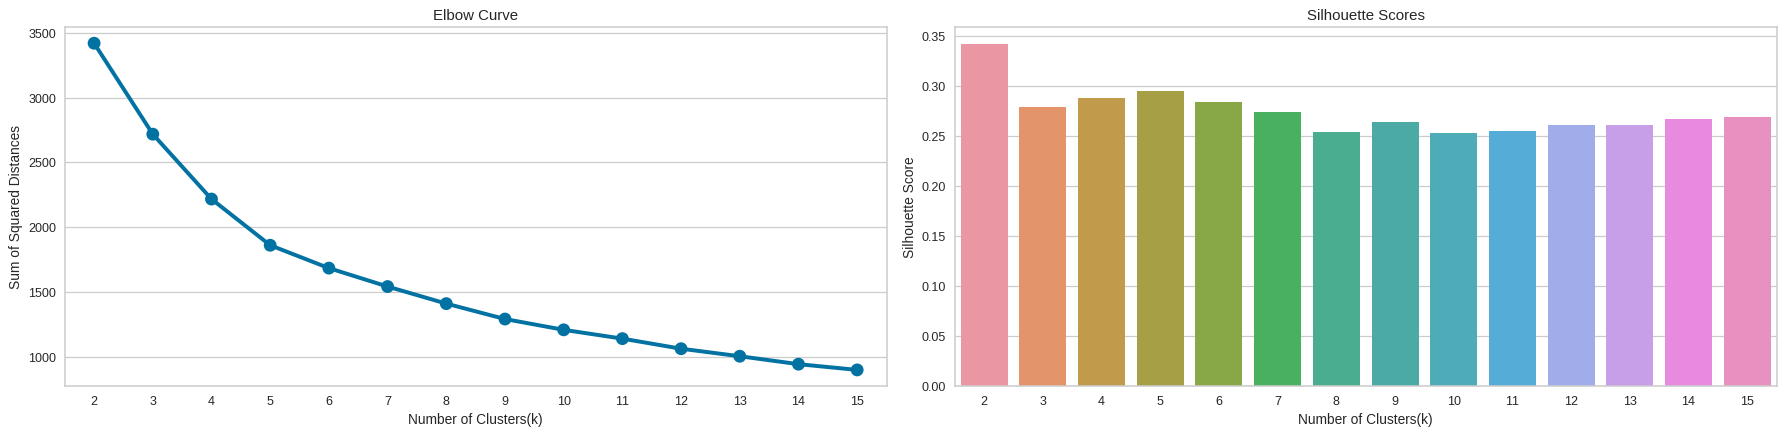

In [56]:
# Storing sum of squared distances and Silhouette Scores for each value of k in k means clusterer
ssd,score = [],[]
# Setting figure Size
plt.figure(figsize=(20,5), dpi=90)

# Initializing the list of clusters for tuning the best clusters
n_clusters = list(range(2,16))

# Running a for loop of Kmeans algorithm
for k in n_clusters:
    clusterer = KMeans(n_clusters = k, init= 'k-means++', max_iter= 1000)
    y_preds = clusterer.fit_predict(X)                                          # Fitting the model
    ssd.append(clusterer.inertia_)                                              # Appending the inertia
    score.append(silhouette_score(X, y_preds))                                  # Appending the silhoutte score

# Plotting Elbow curve to find optimal K
plt.subplot(1, 2, 1)                                                            #Initializing subplots
sns.pointplot(x=n_clusters, y=ssd)                                              # plotting point plot
plt.xlabel('Number of Clusters(k)')                                             # Setting x label
plt.ylabel('Sum of Squared Distances')                                          # Setting y label
plt.title('Elbow Curve')                                                        # Setting the title

# Silhouette Score v/s Number of Clusters
plt.subplot(1, 2, 2)                                                            #Initializing subplots
sns.barplot(x=n_clusters, y=score)                                              # plotting bar plot
plt.xlabel('Number of Clusters(k)')                                             # Setting x label
plt.ylabel('Silhouette Score')                                                  # Setting y label
plt.title('Silhouette Scores')                                                  # Setting the title
plt.tight_layout()

# **Observations:**
1. The number of clusters can be determined from the elbow curve, where 5 appears to be at the elbow. Depending on the segmentation goal, n_clusters=4 or 6 can also be taken into consideration.
2. If the best number of clusters is determined by the maximum Silhouette Score, then n_clusters=2 can be selected.
3. We can choose the intersection of the set of nice n_clusters acquired from both graphs if we look at both at once to determine the ideal number of clusters. Therefore, since 4 is close to the elbow of the elbow curve and has a respectable Silhouette score, it seems like a wise decision.

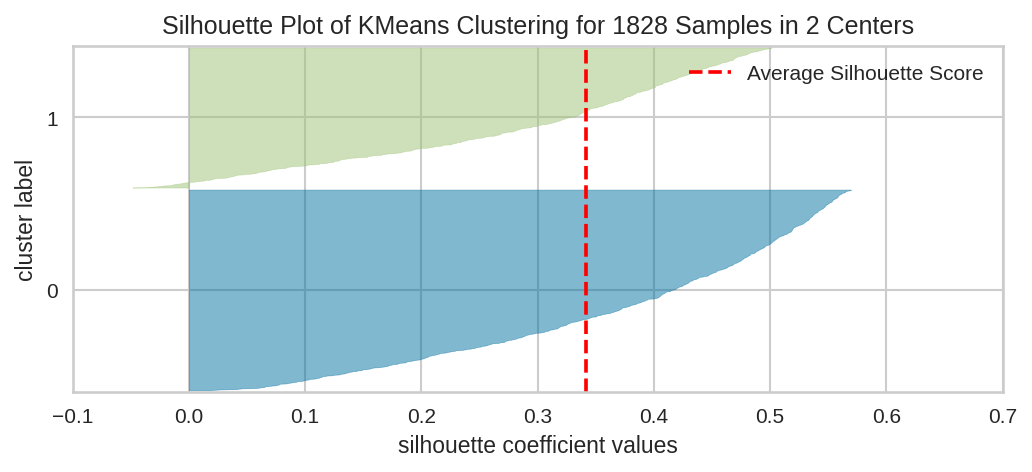

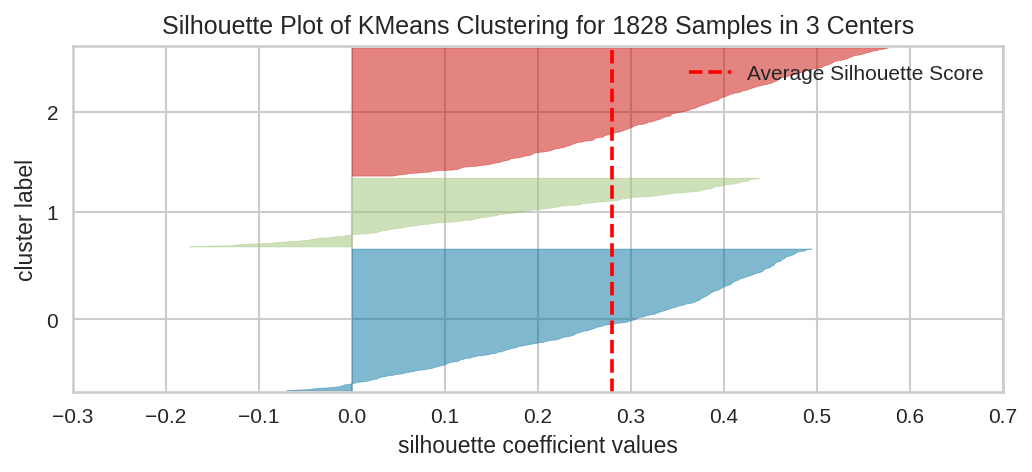

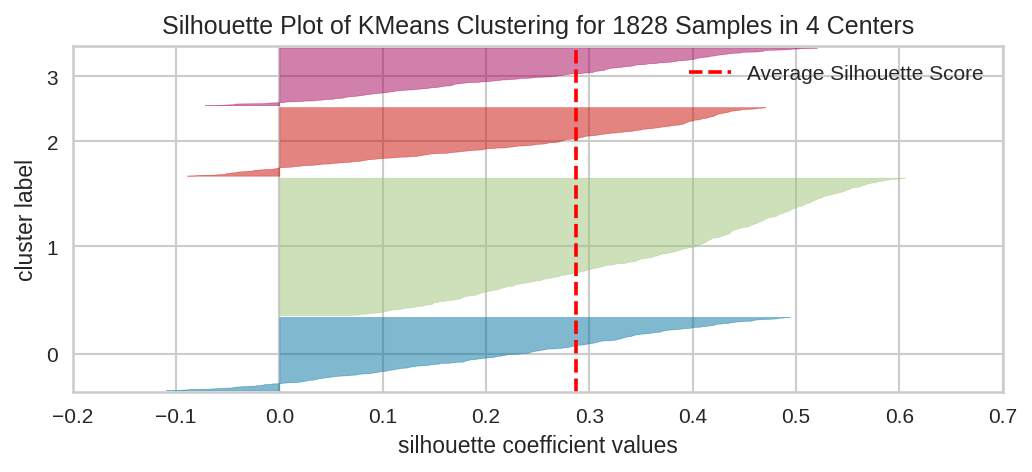

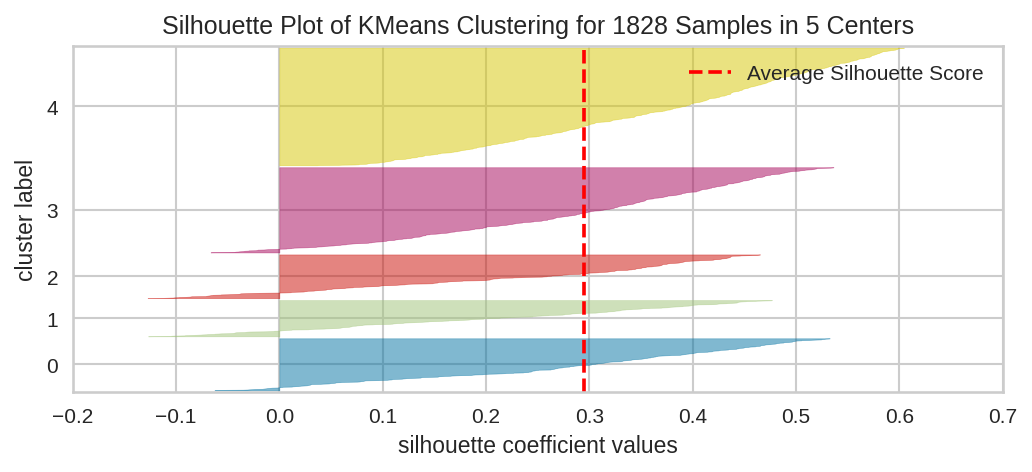

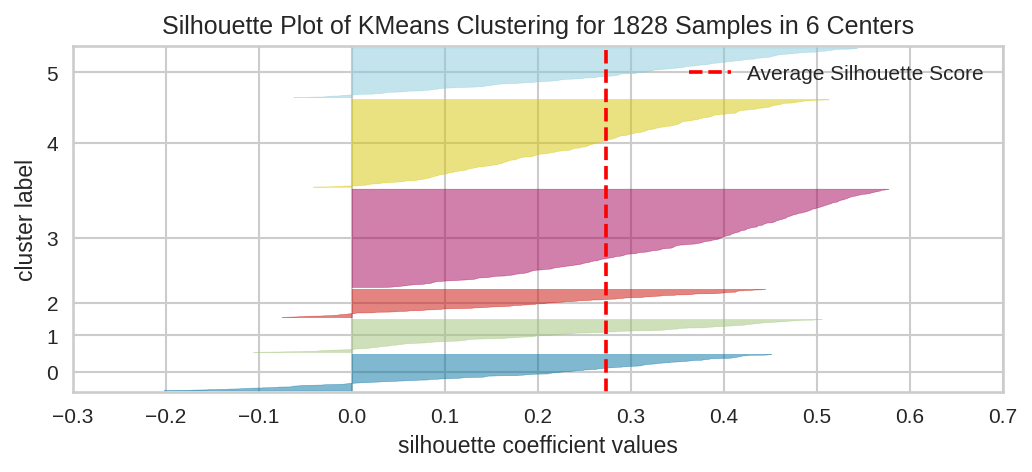

In [57]:
# Visualizing the Silouette plots for the clusters
for i in range(2,7):
    plt.figure(figsize = (8, 3), dpi=150)
    kmeans=KMeans(i,init="k-means++")
    visualizer=SilhouetteVisualizer(kmeans,colors='yellowbrick')
    visualizer.fit(X)
    visualizer.show()

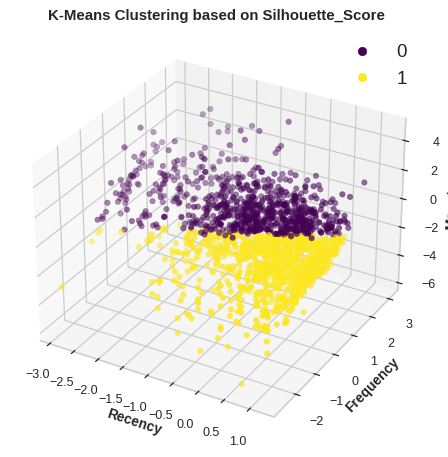

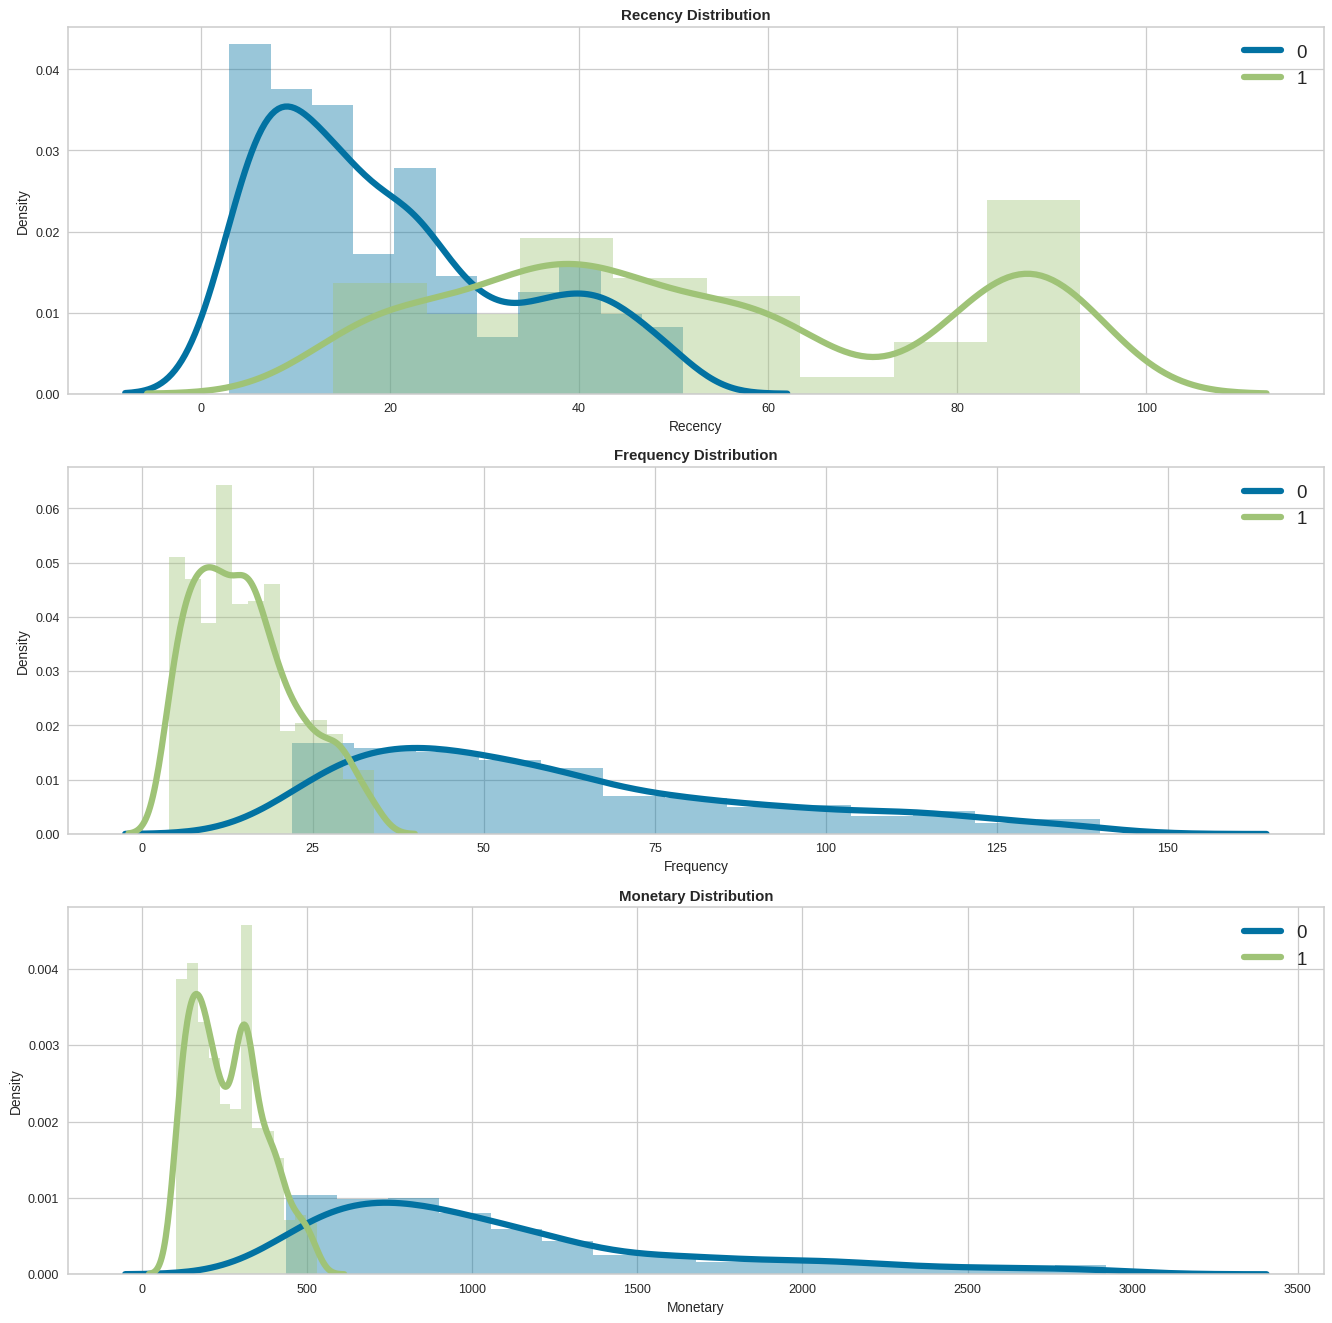



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



In [58]:
# Fitting the model on n_clusters = 2 based on Silhouette_Score to visualise the segments.
kmc = KMeans(n_clusters=2,init="k-means++")             # Setting 2 Clusters
y = kmc.fit_predict(X)                                  # FItting the model
centers = kmc.cluster_centers_                          # Storing the centriods

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Silhouette_Score'  # Setting the title
segment_name = 'K-Means|2Cluster'
overlap_supress = 0.1
color="inferno"
conclusion[segment_name] = plots_stats_summary(y, segment_name, color,title, overlap_supress)

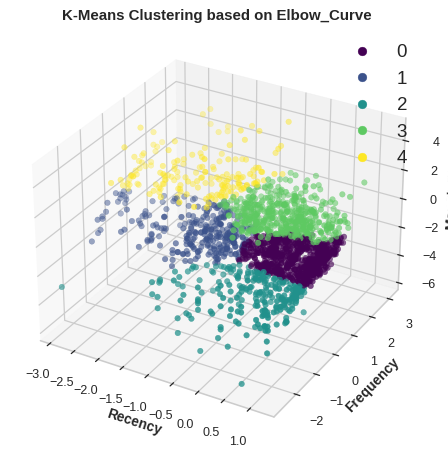

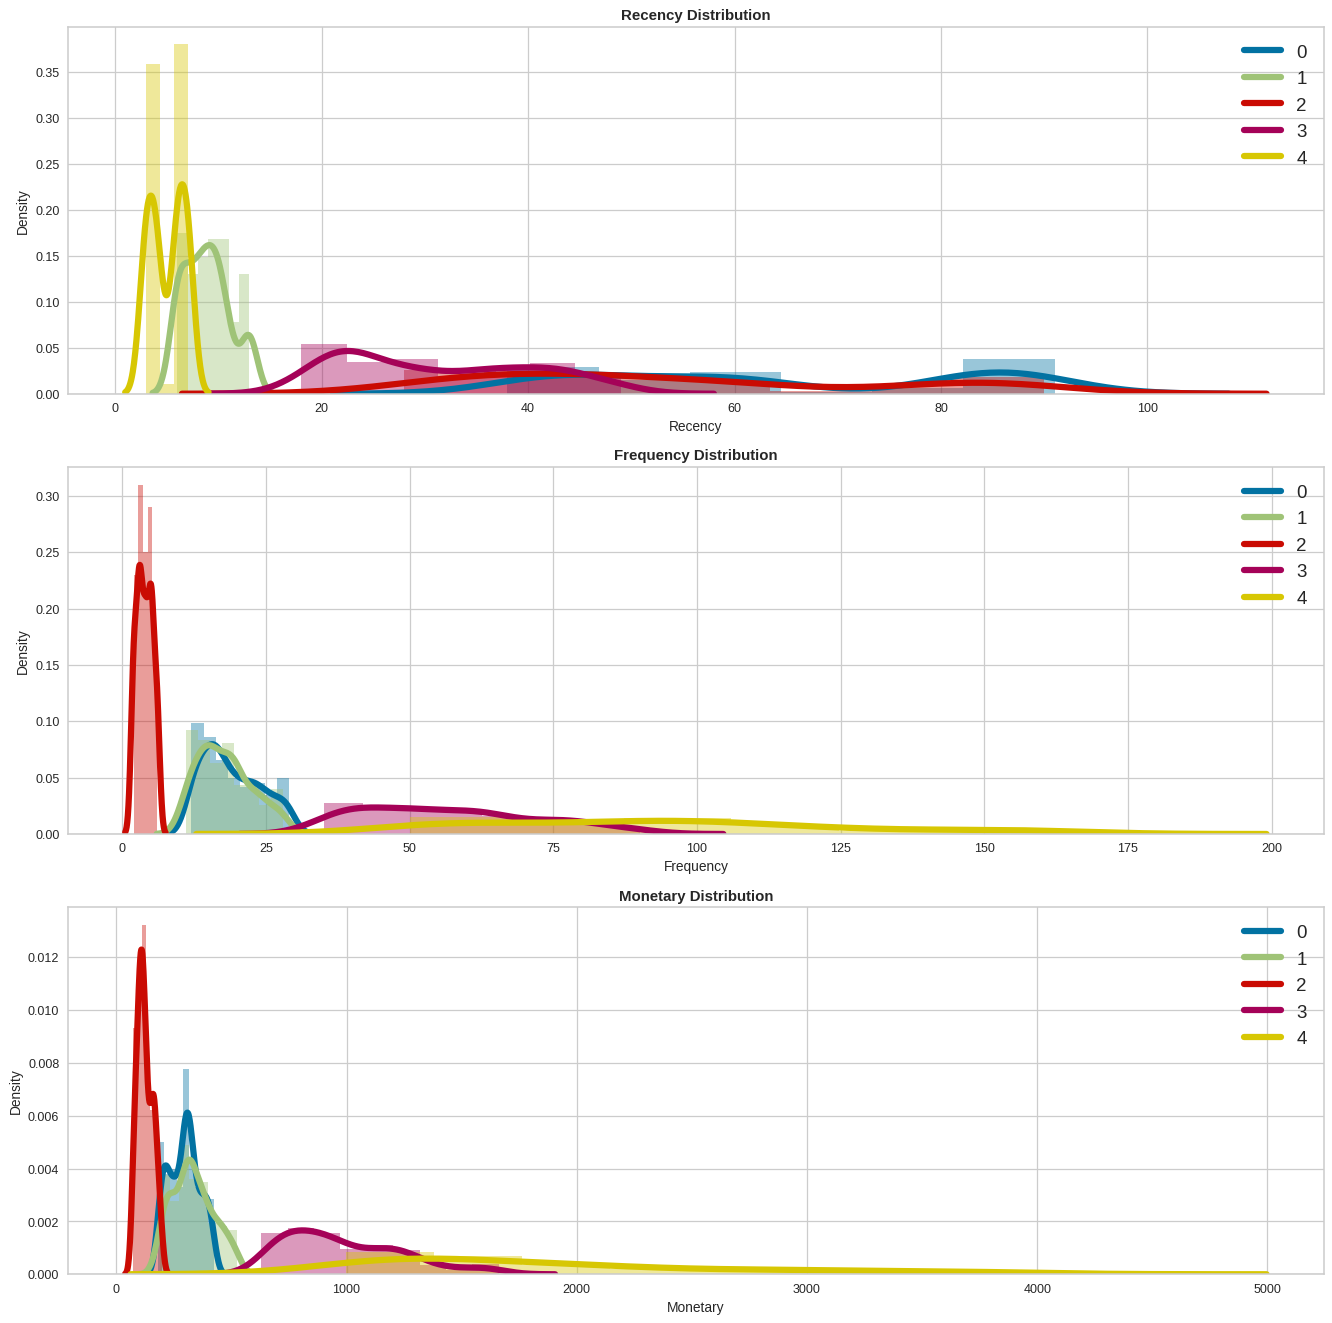



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



In [59]:
# Fitting the model on n_clusters = 5 based on Elbow_Curve to visualise the segments.
kmc = KMeans(n_clusters=5,init="k-means++")           # Setting 5 Clusters
y = kmc.fit_predict(X)                                # Fitting the model
centers = kmc.cluster_centers_                        # Storing the centriods

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Elbow_Curve'     # Setting the title
segment_name = 'K-Means|5Cluster'
overlap_supress = 0.2
color="tab20"
conclusion[segment_name] = plots_stats_summary(y, segment_name,color, title, overlap_supress)

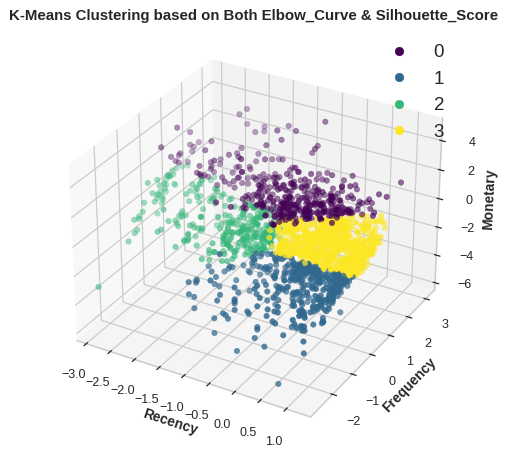

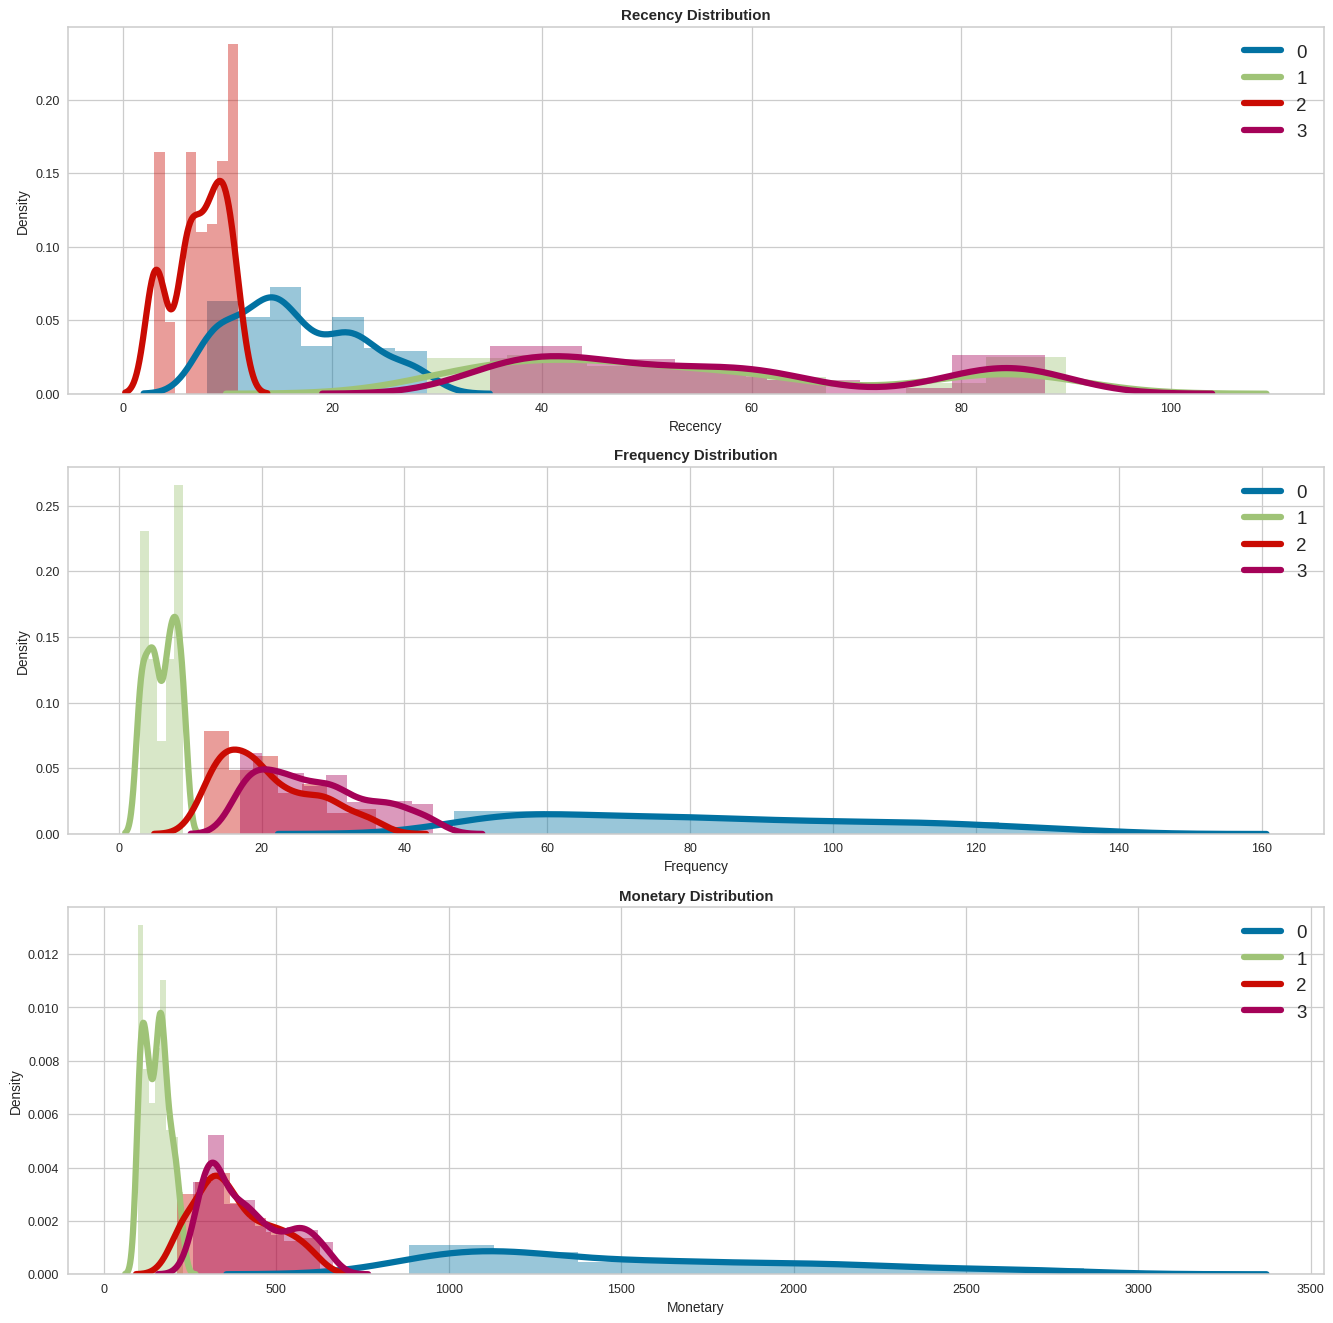



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



In [60]:
# Fitting the model on n_clusters = 4 based on Both Elbow_Curve & Silhouette_Score to visualise the segments.
kmc = KMeans(n_clusters=4,init="k-means++")         # Setting 4 Clusters
y = kmc.fit_predict(X)                              # Fitting the model
centers = kmc.cluster_centers_                      # Storing the centriods

# Plotting Clusters for Visualization
title = 'K-Means Clustering based on Both Elbow_Curve & Silhouette_Score'         # Setting the title
segment_name = 'K-Means|4Cluster'
overlap_supress = 0.2
color="Pastel1"
conclusion[segment_name] = plots_stats_summary(y, segment_name, color,title, overlap_supress)

# **Hierarchical Clustering**

A well-liked unsupervised machine learning approach for clustering or grouping data points according to their similarity is called hierarchical clustering. It is a network of nested clusters that resembles a tree, with the root node standing in for the entire dataset and the leaves for particular data points.


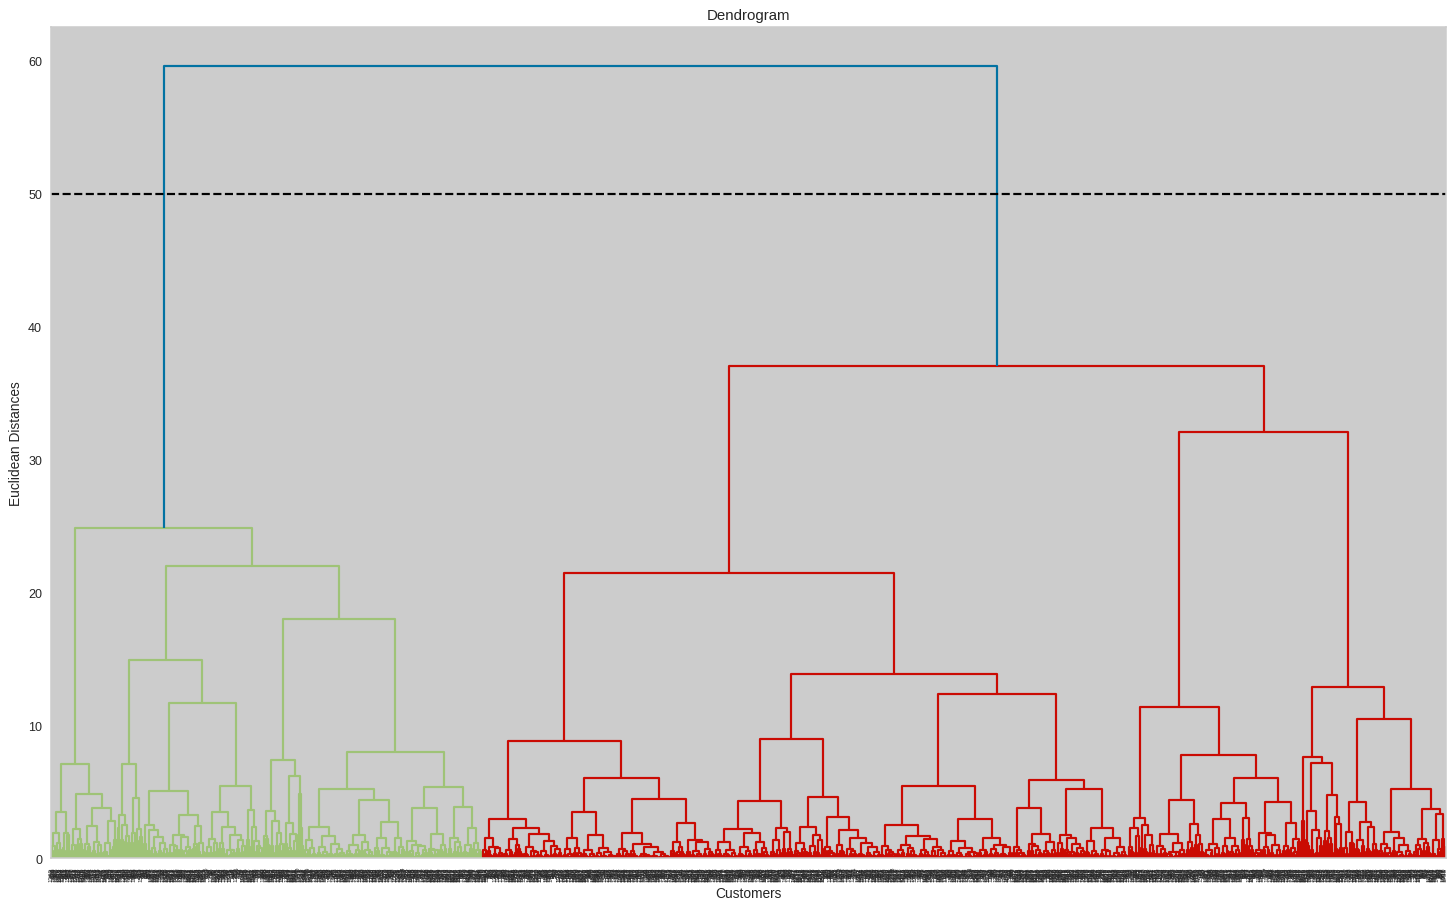

In [61]:
# Using the Dendogram to Decide the number of clusters
plt.figure(figsize=(20,12), dpi=90)                         # Setting the figure size
dendrogram(linkage(X, method='ward'), color_threshold=50)   # using ward linkage method to differ similarities
plt.title('Dendrogram')                                     # Setting the title
plt.xlabel('Customers')                                     # Setting the x label
plt.ylabel('Euclidean Distances')                           # Setting y label
plt.axhline(y=70, color='black', linestyle='--')            # Setting the axis line for y=70
plt.axhline(y=50, color='black', linestyle='--')            # Setting the axis line for y=50
plt.show()

# **Interpretation:**
1. We can determine a threshold distance and then draw a horizontal line. Typically, we strive to set the threshold so that it cuts the tallest vertical line. This threshold can be placed at 50 or 70, and a horizontal line can be drawn as in the dendogram above.
2. The number of vertical lines that the line drawn using the threshold intersects will determine how many clusters there are. The smaller criterion (y=50) yields 3 clusters while the greater threshold (y=70) yields 2 clusters.


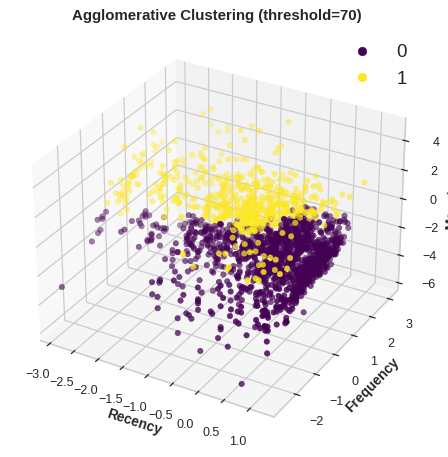

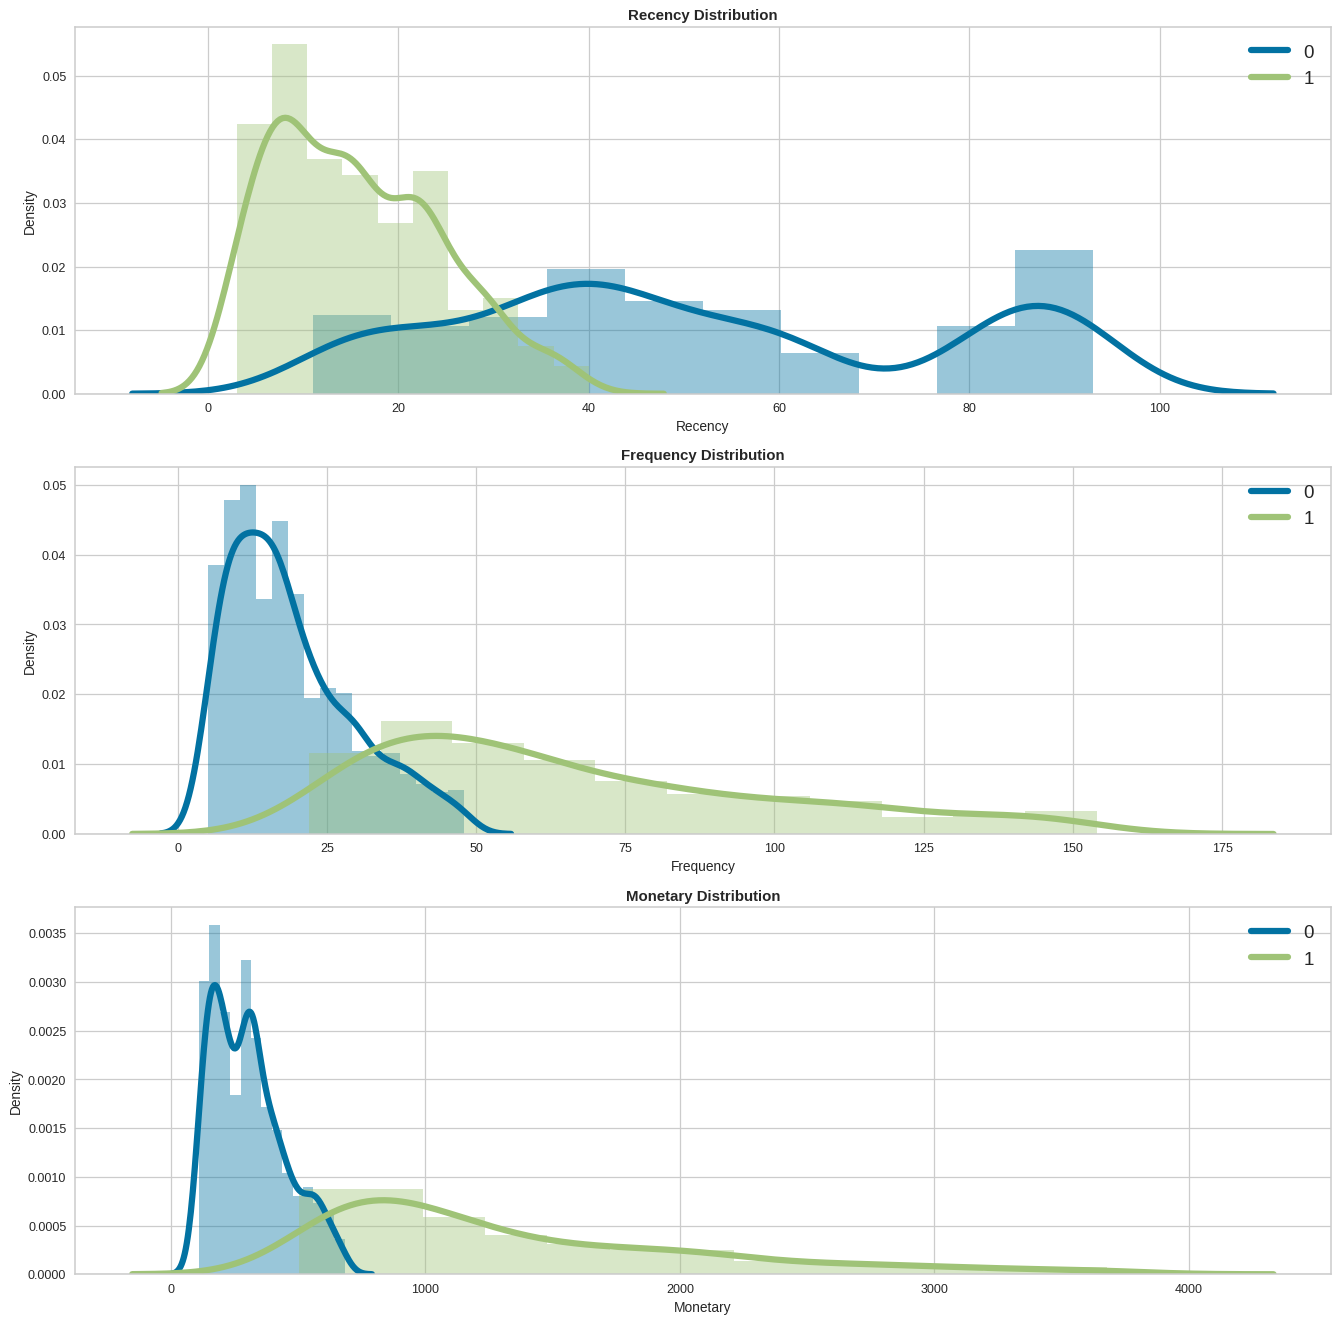



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



In [62]:
# Fitting hierarchical clustering with number of clusters based on dendogram distance threshold = 70
ahc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')     # Initializing the model
y = ahc.fit_predict(X)                                                                # Fitting and predicting the model

# Lets visualize the clusters with n_clusters = 2
title = 'Agglomerative Clustering (threshold=70)'                                     # Setting the title
segment_name = 'hierarchical|2Cluster'
overlap_supress = 0.1
color="gnuplot"
conclusion[segment_name] = plots_stats_summary(y, segment_name, color,title, overlap_supress)

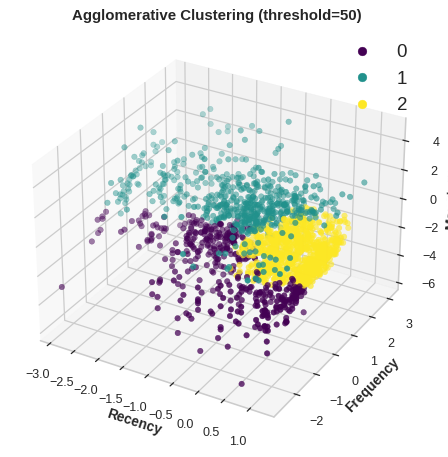

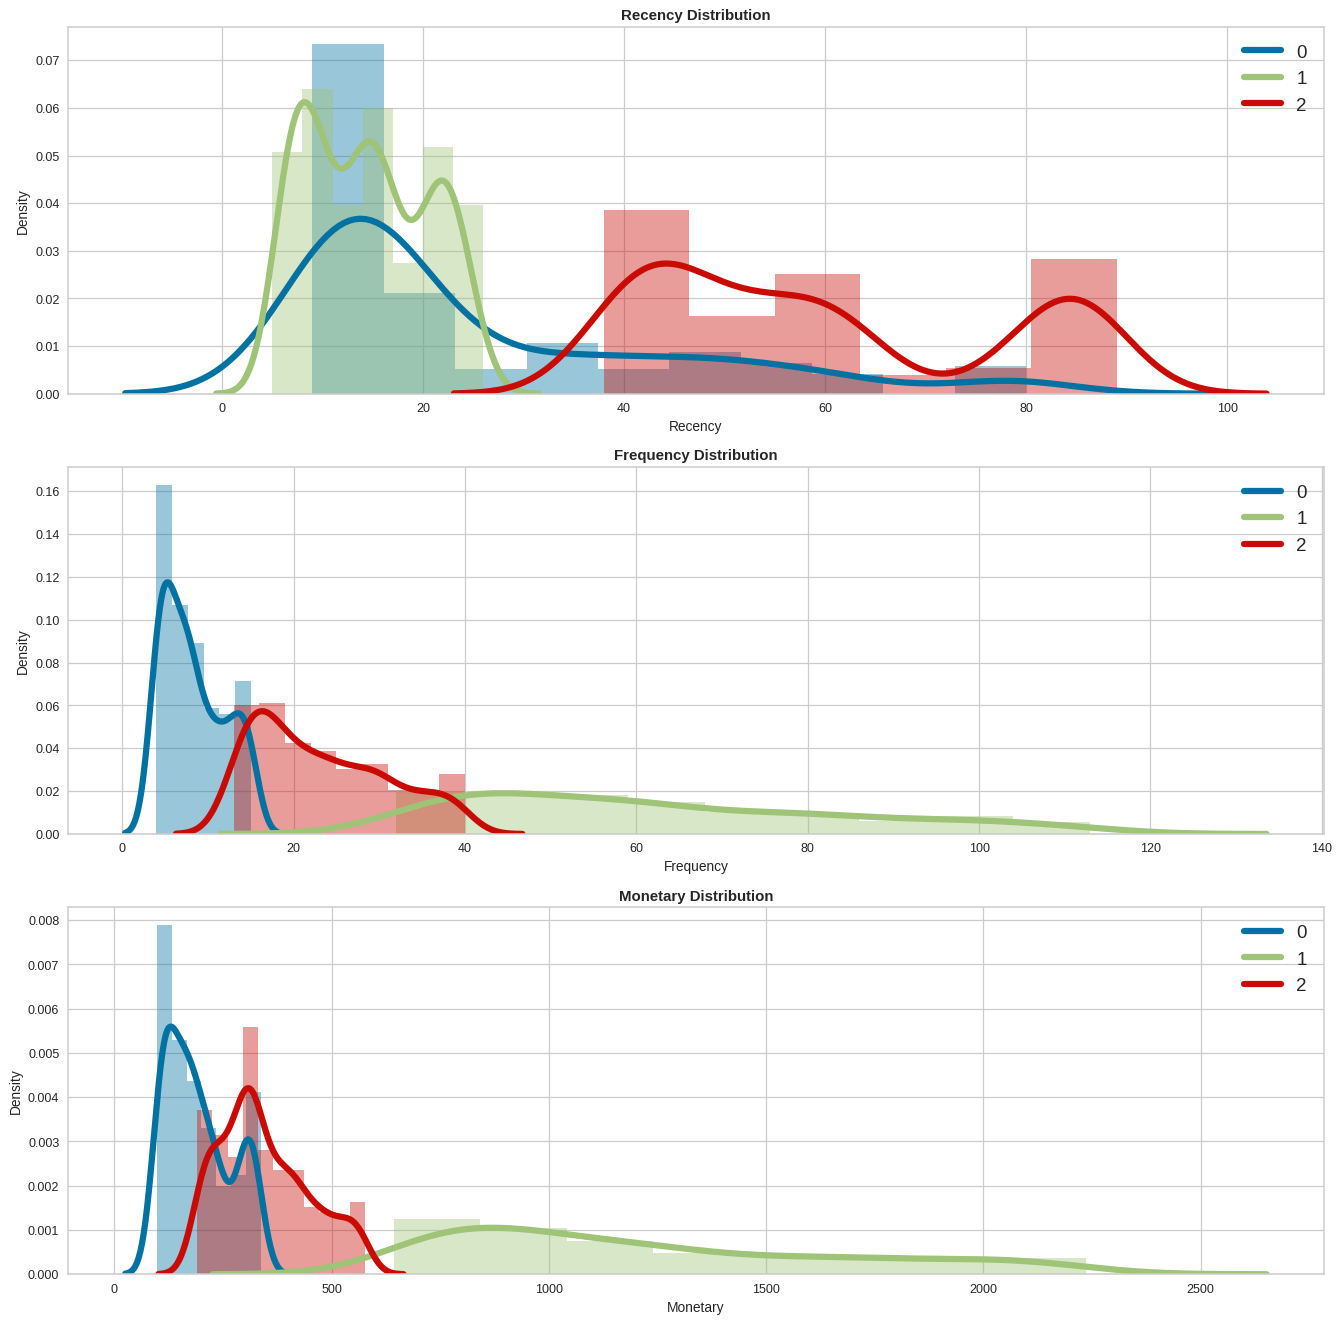



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



In [63]:
# Fitting hierarchical clustering with number of clusters based on dendogram distance threshold = 50
ahc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')     # Initializing the model
y = ahc.fit_predict(X)                                                                # Fitting and predicting the model

# Lets visualize the clusters with n_clusters = 3
title = 'Agglomerative Clustering (threshold=50)'                                     # Setting the title
segment_name = 'hierarchical|3Cluster'
overlap_supress = 0.2
color="rainbow"
conclusion[segment_name] = plots_stats_summary(y, segment_name, color,title, overlap_supress)

# **DBScan Clusterer**

Popular unsupervised machine learning approach DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is used to cluster or group data points according to their density. It is a density-based clustering technique designed to find clusters of any size and shape.




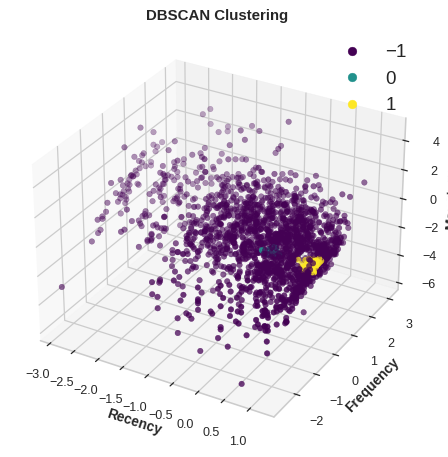

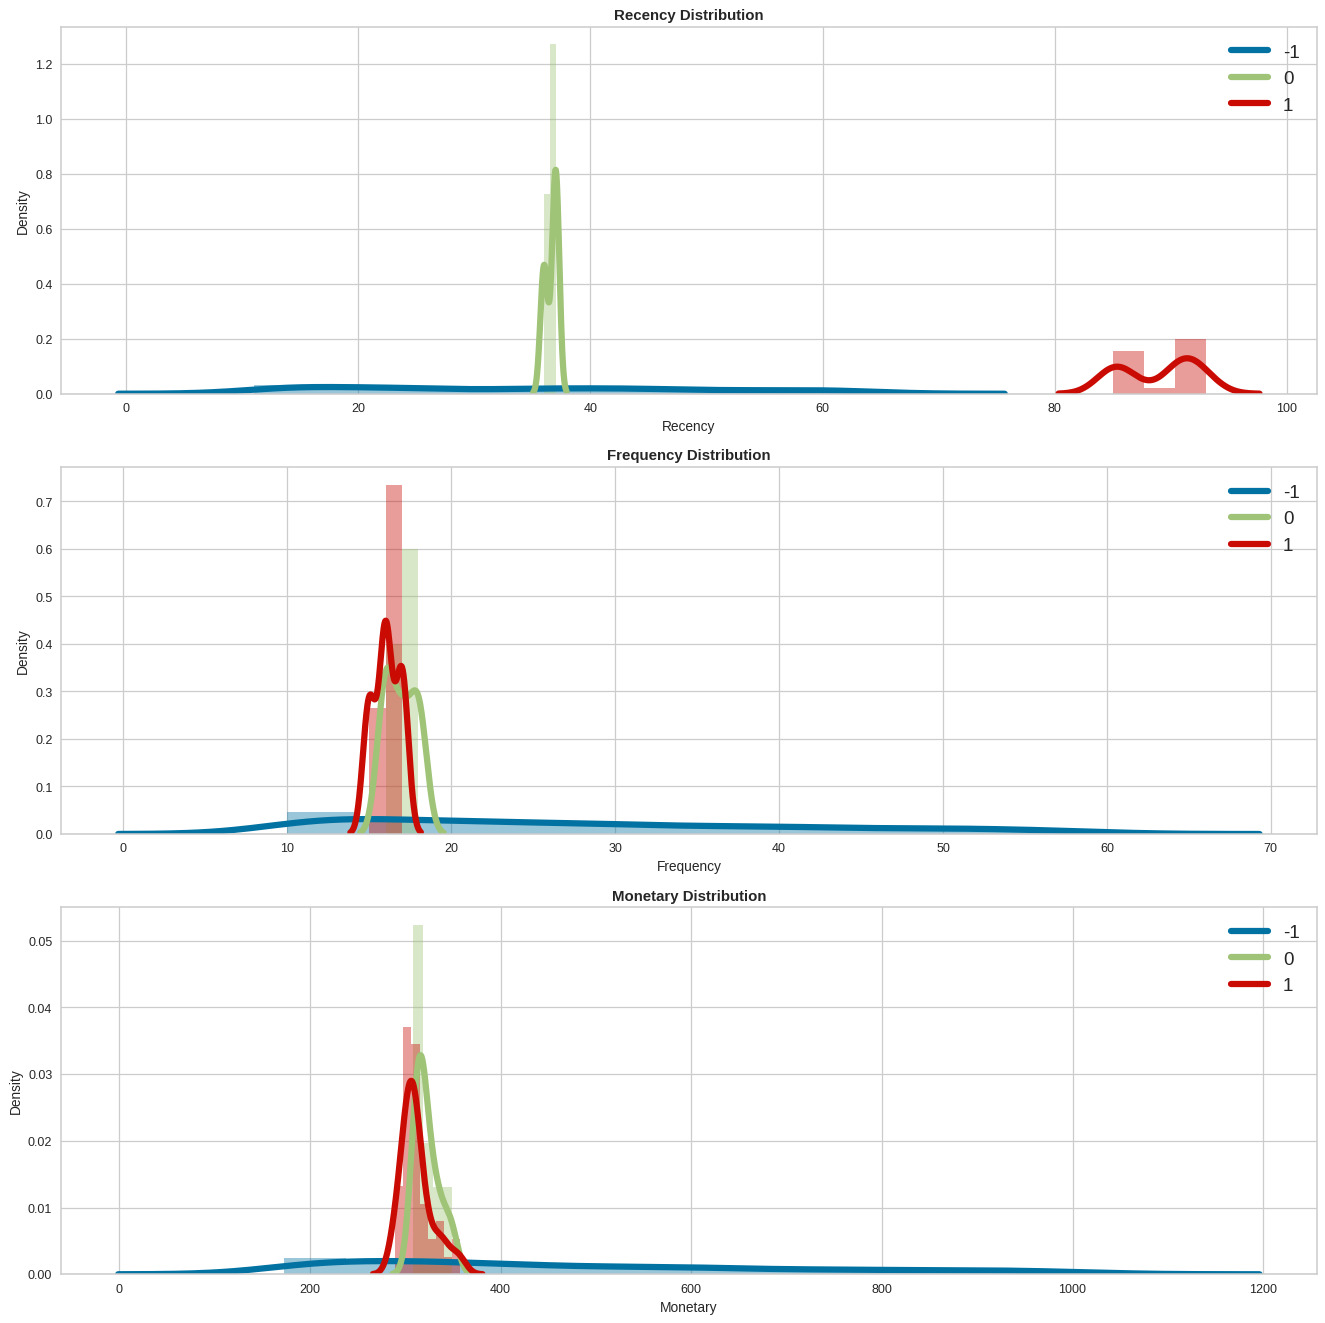



Displaying the mean median and count of Recency, Frequency and Monetary for each group with the description:



In [64]:
# Fitting DBSCAN clusterer
dbsc = DBSCAN(eps=0.2, min_samples=25)                                # Initializing the model
y = dbsc.fit_predict(X)                                               # Fitting the model

# Plotting Clusters for Visualization
title = 'DBSCAN Clustering'                                           # Setting the title
segment_name = 'DBSCAN'
overlap_supress = 0.2
color="YlGnBu"
conclusion[segment_name] = plots_stats_summary(y, segment_name, color,title, overlap_supress)

1. There is an alternative to KMeans and hierarchical clustering called density-based spatial clustering of applications with noise (DBSCAN). Since the clusters are created by connecting nearby points, it is not necessary for us to indicate how many clusters there are.
2. It steers clear of outliers and locates nested clusters in the data. Despite the jumbled nature of the data and the lack of any significant visible nested clusters, it was nevertheless able to identify 4 clusters, as shown above, using the provided hyperparameters.


In [65]:
# Summarizing the results obtained by clustering using various methods
summary = pd.DataFrame({"Clusterer": ['Binning','Quantile Cut', "K-Means", "K-Means", "K-Means", "Agglomerative","Agglomerative", "DBSCAN"],
                        'Criterion': ['RFM Score Binning', 'RFM Quantile Cut', 'Elbow Curve', 'Silhouette Score','Elbow Curve & Silhouette Score',
                                      'Dendogram (y=70)', 'Dendogram (y=50)', 'eps=0.2, min_samples=25'],
                        "Segments" : [4,4,5,2,4,2,3,4]},
                        index=['', '', '', '', '', '', '', ''])
summary.T

\
Clusterer            Binning      Quantile Cut      K-Means           K-Means   
Criterion  RFM Score Binning  RFM Quantile Cut  Elbow Curve  Silhouette Score   
Segments                   4                 4            5                 2   

                                                                               \
Clusterer                         K-Means     Agglomerative     Agglomerative   
Criterion  Elbow Curve & Silhouette Score  Dendogram (y=70)  Dendogram (y=50)   
Segments                                4                 2                 3   

                                    
Clusterer                   DBSCAN  
Criterion  eps=0.2, min_samples=25  
Segments                         4

In [66]:
# print the all summary
color=['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu']
for i,segment_name in enumerate(conclusion):
  dataframe=conclusion[segment_name][1]
  display(dataframe.reset_index().style.set_properties(**{'text-align': 'center'}).hide_index().
          background_gradient(cmap=color[i]))
  print("--"*50)

----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------


#**Conclusion**

1. In order to quickly assess the data and determine where and how to best utilise it, we began with a simple binning and quantile-based segmentation model before moving on to more complex models.
2. After that, we switched to k-means clustering and displayed the outcomes using various cluster densities. As far as we know, there is no guarantee that using k-means will produce the ideal answer everywhere. Moving forward, we also used DBSCAN clusterer and hierarchical clustering.
3. We categorised the consumers based on their behavioural characteristics to determine their value, loyalty, profitability, etc. for the business. We then built a number of relevant clusters of customers on the basis of these metrics and methodologies. Even if they are not apparent in the plots, considerably separated clusters are still present, and the resulting clusters are generally valid and valuable according to the methods and statistics that were taken from the data.
4. Segments are determined by the level of granularity desired in the clusters and how the business intends to use the results. Keeping these considerations in mind, we clustered the key segments according to several criteria that we understood, as can be seen in the summary dataframe.

